# Import neccesary packages

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.keras as keras
import pandas as pd

### Loading data
There are four dataframes named 'reg#.csv' in synth_data.

In [2]:
df=pd.read_csv('./synth_data/reg5.csv')
x,y=df['x'].values,df['y'].values
y += np.random.normal(0,0.3*np.std(y),len(y))
print (type(x),x.shape,type(y),y.shape)

<class 'numpy.ndarray'> (10000,) <class 'numpy.ndarray'> (10000,)


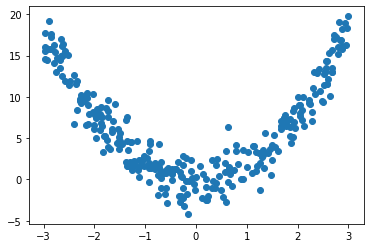

In [3]:
choice=np.random.choice(np.arange(len(x)),300)
plt.scatter(x[choice],y[choice])

In [4]:
def polynomial(x,coeffs):
    '''coeffs is a coeeficients dict with int keys for power and coeeficients as
    values
    '''
    total=tf.zeros(x.shape)
    for power,coeff in coeffs.items():
        total += coeff*x**power
    return total

tf.Tensor(
[-12.240946  -26.509281  -28.60805   ...  76.52461   -10.819743
  -3.1765008], shape=(10000,), dtype=float32)


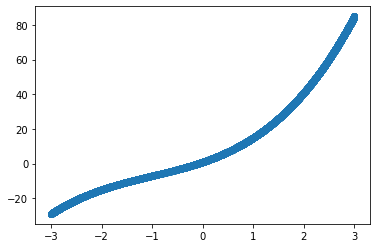

In [5]:
tf_x,tf_y=tf.constant(x,dtype=tf.float32),tf.constant(y,dtype=tf.float32)
y_pred=polynomial(tf_x,{0:1.,1:10.,2:3,3:1})
print (y_pred)
plt.scatter(tf_x.numpy(),y_pred.numpy())

## Problem definition
We are given a dataset which we have loaded above, and want to find a polynomial function which best fits the data. The degree of the polynomial have to be chosen a priori based on our knowledge of the data. Due to the presence of noise, it may not be straightforward to notice the relationship between the dependent variabe $y$ and the independent variable $x$. Any general polynomial of degree $d$ is 
\begin{equation}
\hat{y}=\sum_{i=0}^{i=d}\; a_i\,x^i
\end{equation} 
The values of $a$ and $b$ are unknown and have to be fixed by minimizing the eror between $\hat{y}$ the polynomial-model predicted value and $y$, the value given in the dataset. Any function which is a well-defined metric suffices as the loss function, the most commonly used is the mean squared error defined as 
\begin{equation}
L(a_0,a_1,...,a_d)= \frac{1}{N} \sum_{i=1}^{i=N} \;(\hat{y}(x_i|a_0,a_1,....a_d)-y_i)^2
\end{equation} 
Note that since we have gone to a non-linear definition of the predicted function and the increase in number of tunable parameters $a_i$, the nice features of linear regression is lost and the convergence is highly dependent on the initialized point in the weight space and the nature of the data. Since we do not know the power of the polynomial or if it follows a polynomial expression at all, the convergence of the polynomial model is not always guaranteed. One of the power of neural networks is the ability to learn any given function is a bounded region of the input without any knowledge of its exact form.

In [6]:
d=3
variables={i: tf.Variable(np.random.uniform(-10,10),dtype=tf.float32) for i in range(d+1)}
lr=0.0001
loss_threshold=0.001
verbose_freq=1000
variables

{0: <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-1.2858304>,
 1: <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-6.793897>,
 2: <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-1.4257846>,
 3: <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=7.738683>}

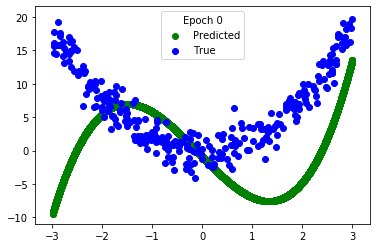

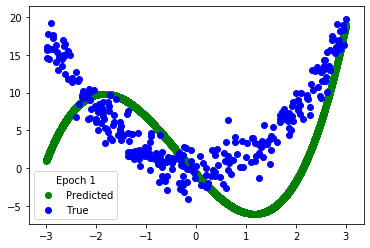

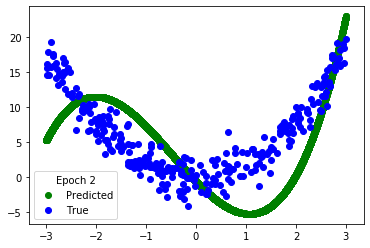

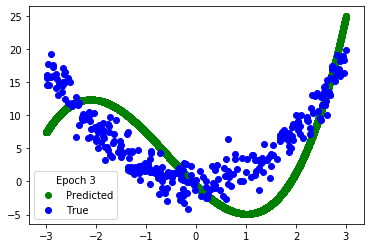

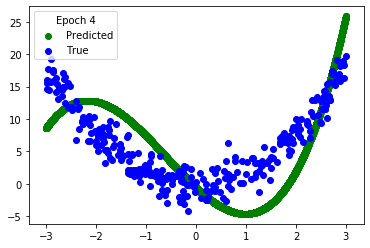

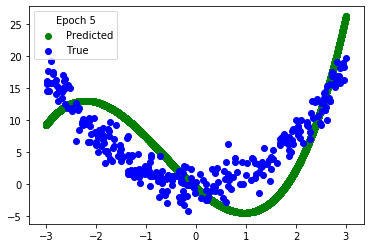

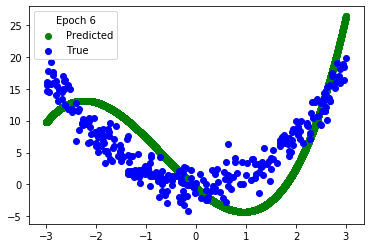

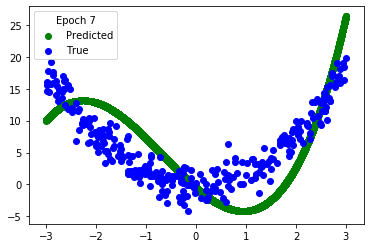

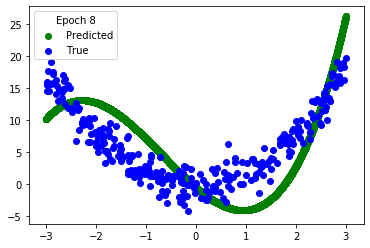

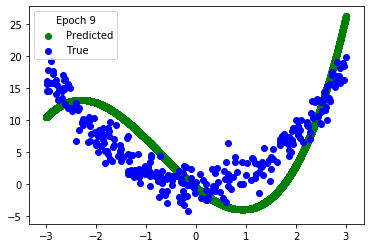

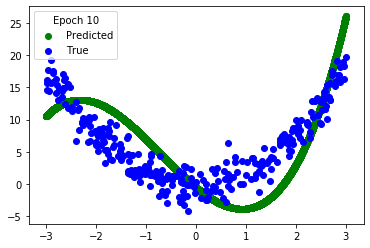

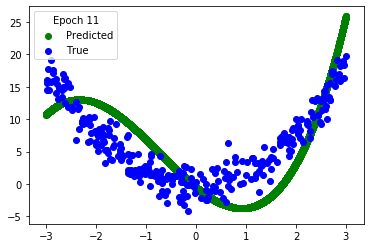

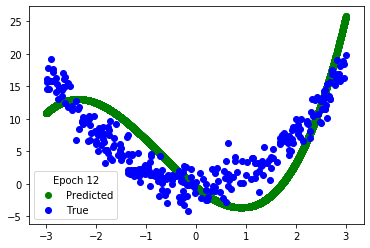

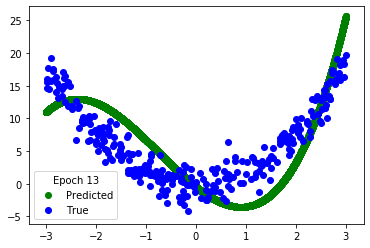

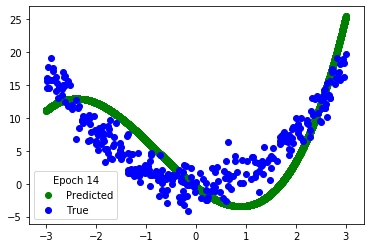

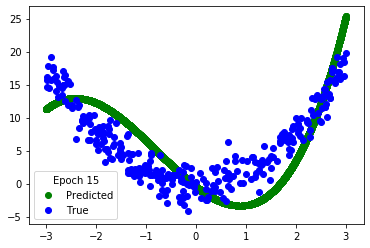

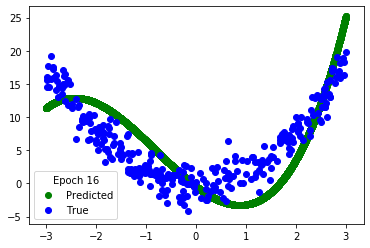

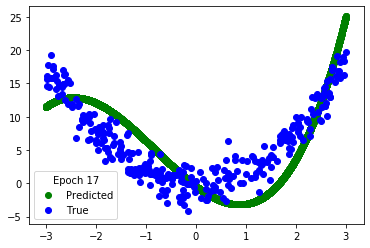

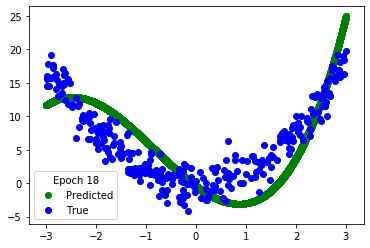

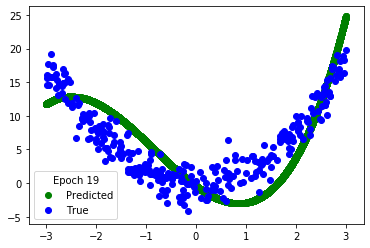

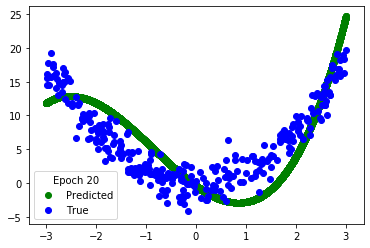

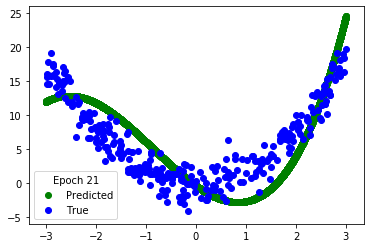

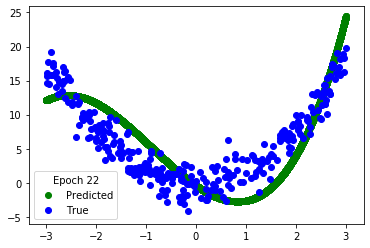

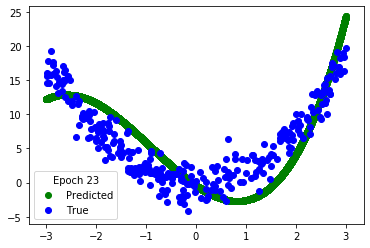

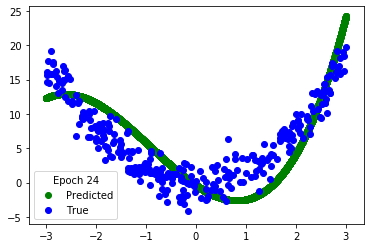

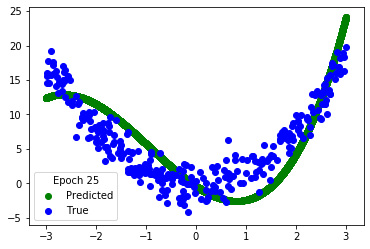

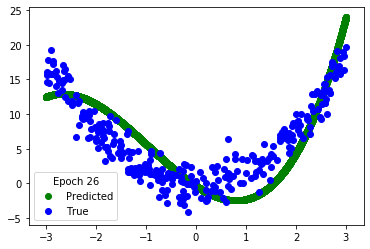

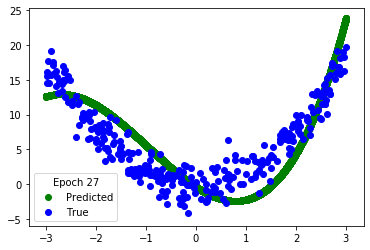

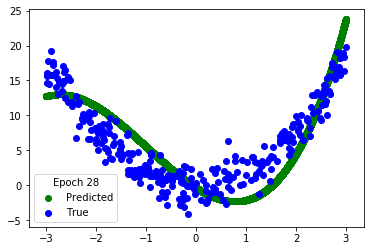

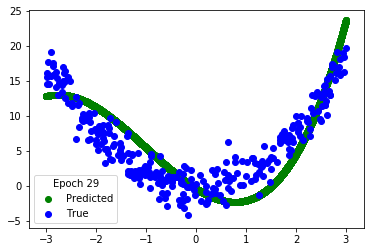

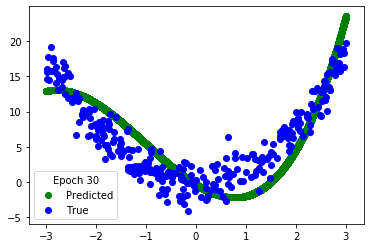

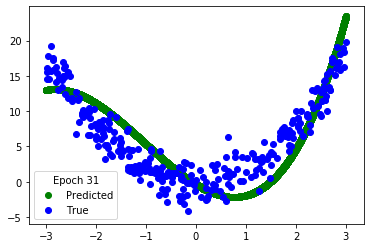

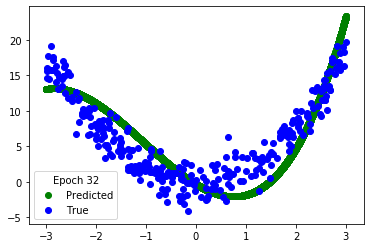

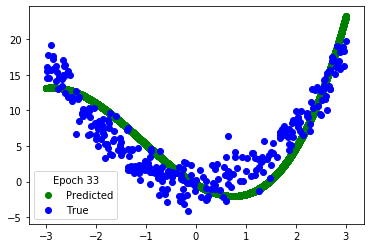

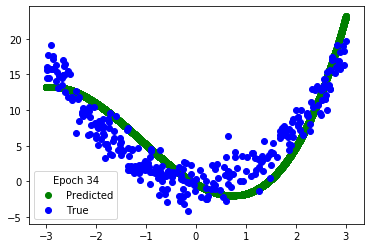

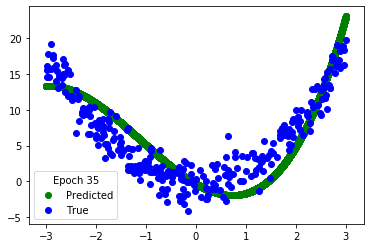

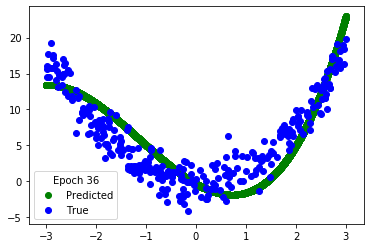

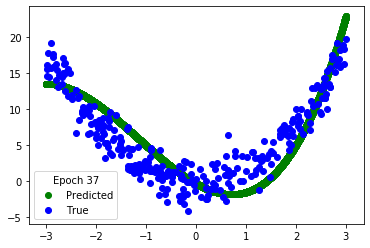

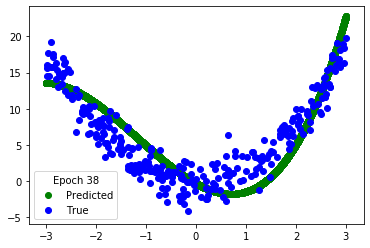

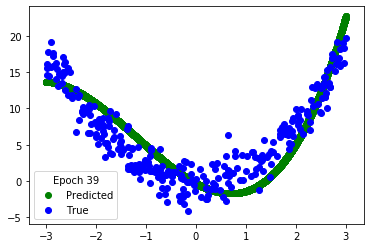

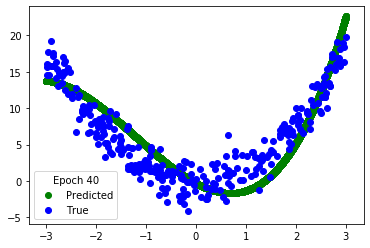

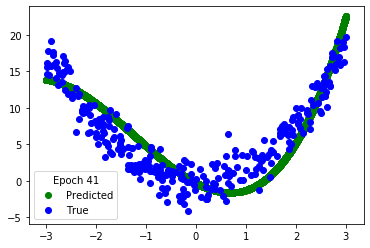

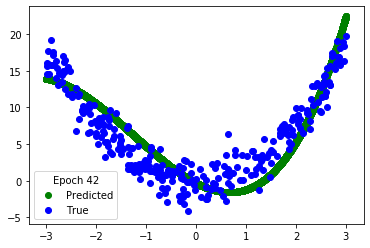

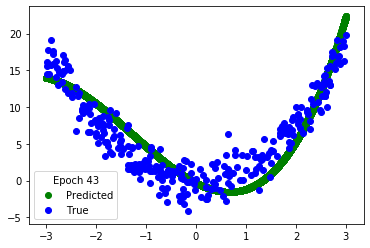

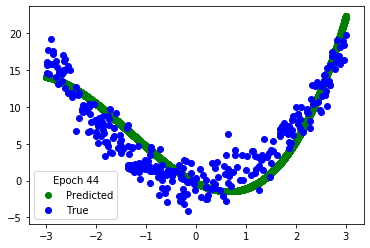

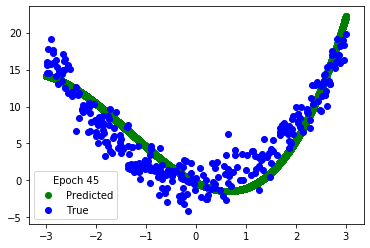

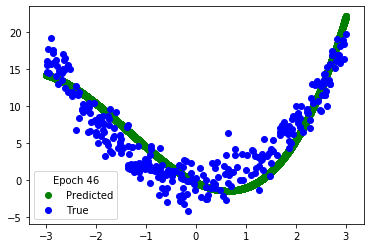

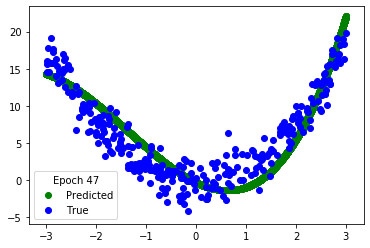

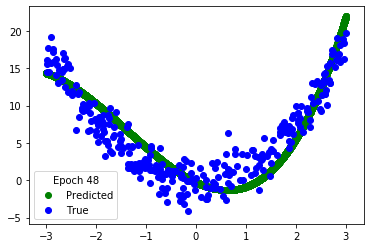

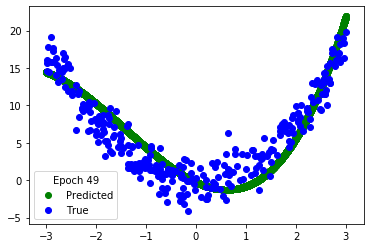

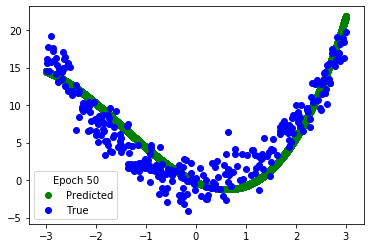

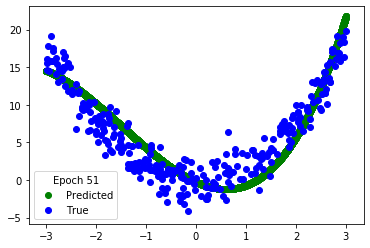

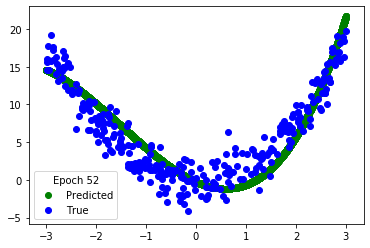

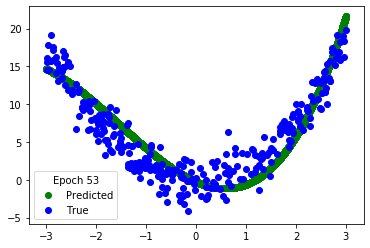

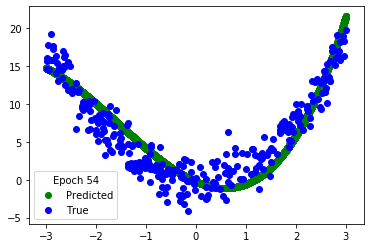

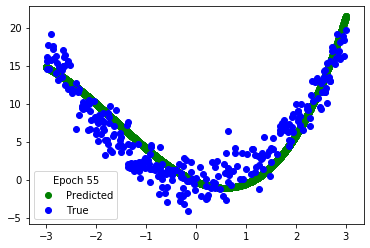

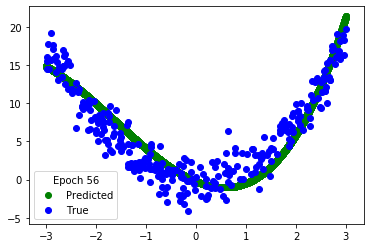

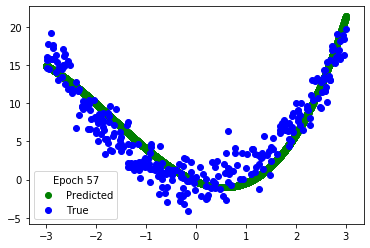

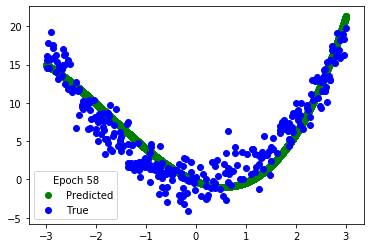

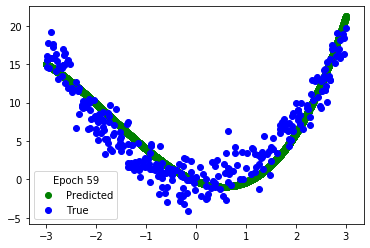

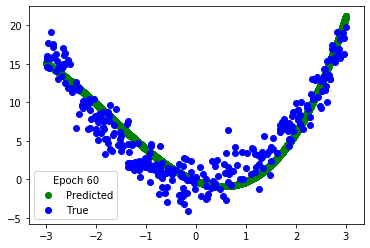

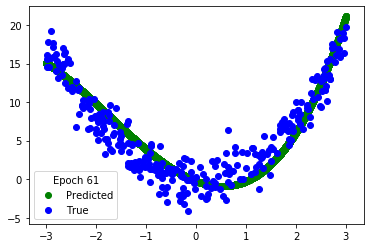

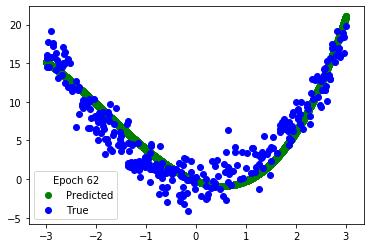

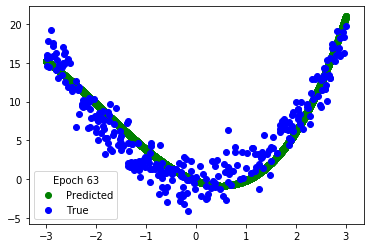

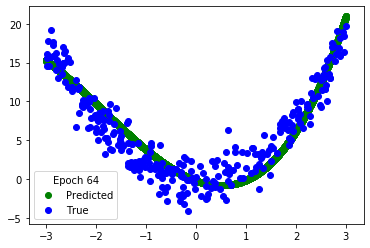

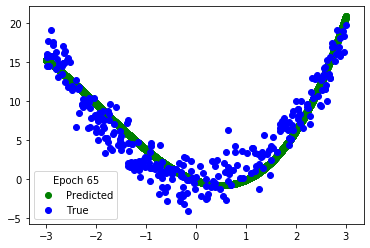

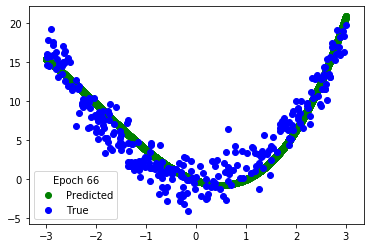

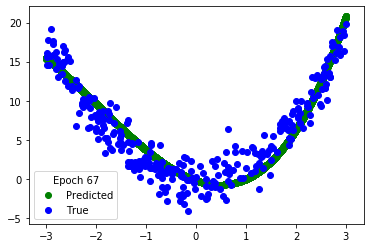

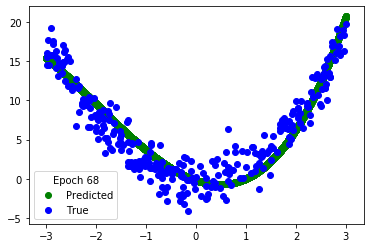

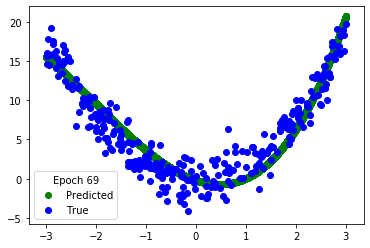

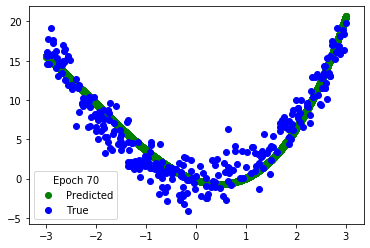

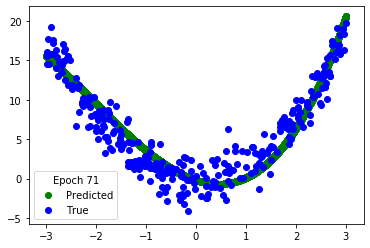

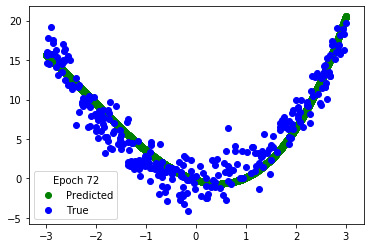

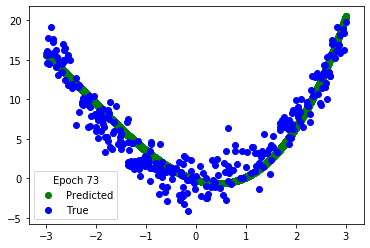

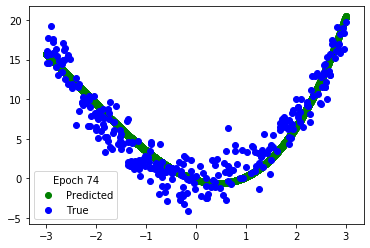

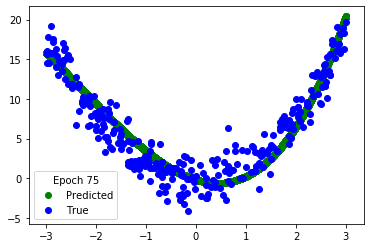

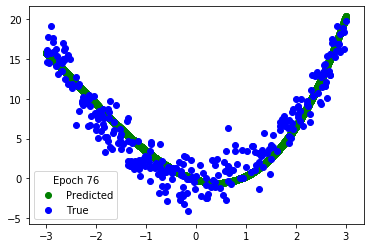

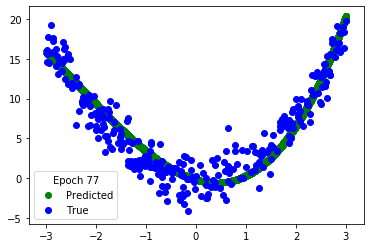

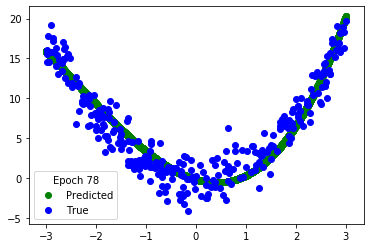

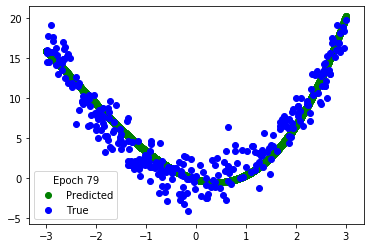

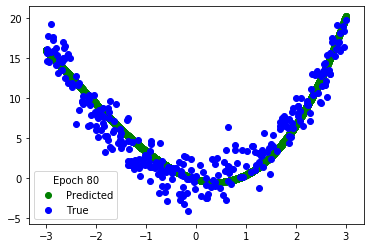

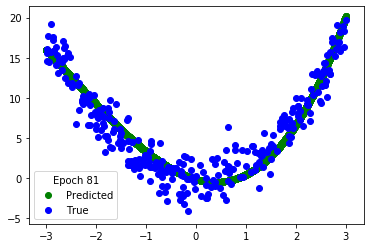

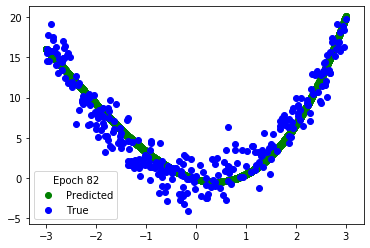

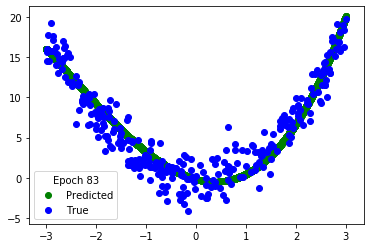

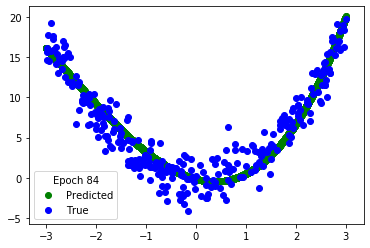

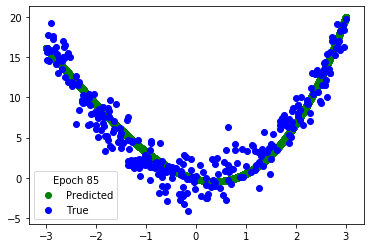

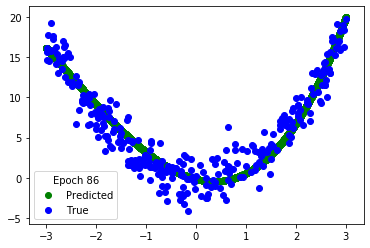

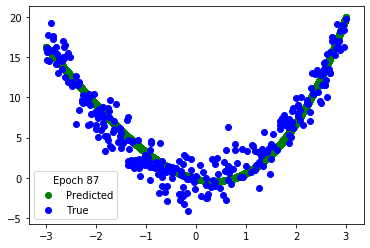

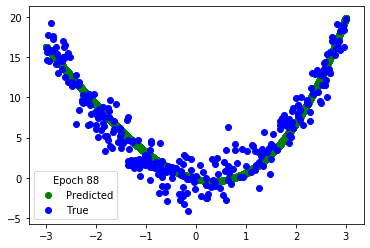

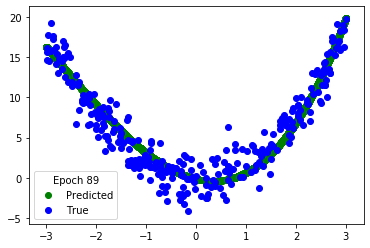

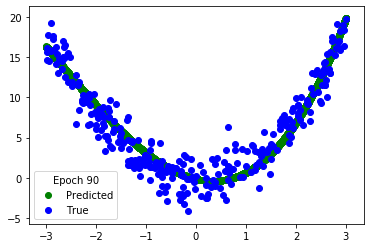

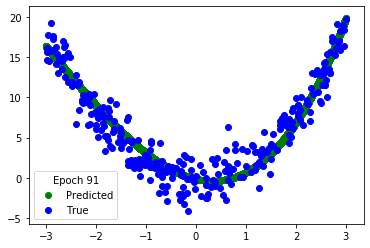

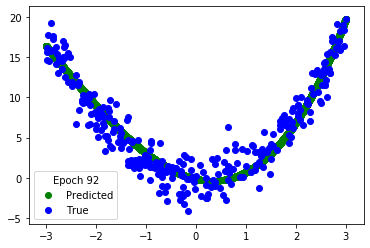

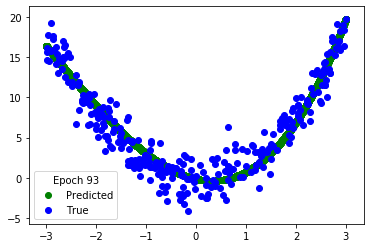

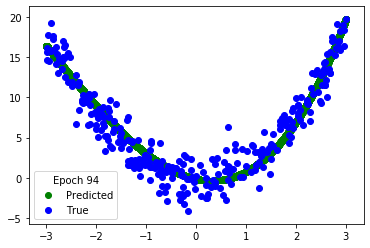

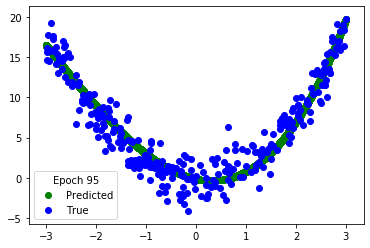

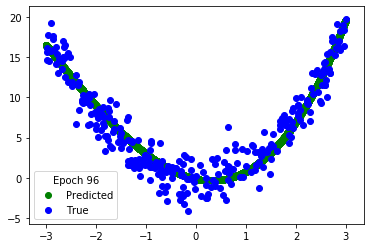

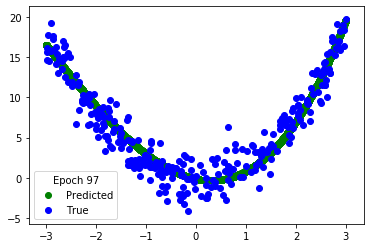

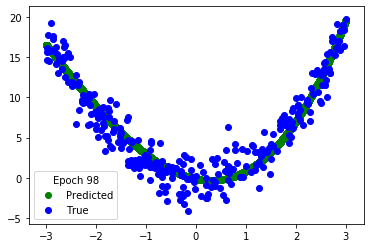

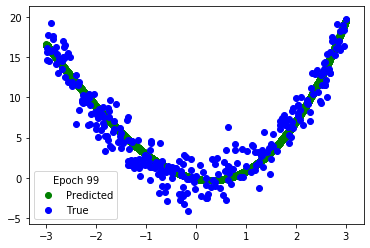

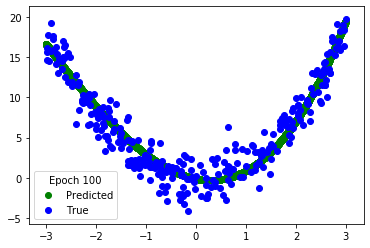

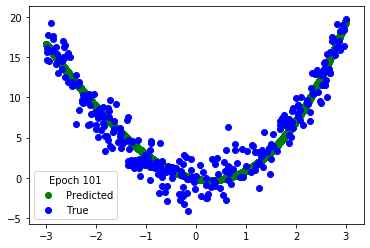

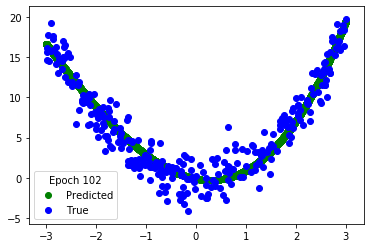

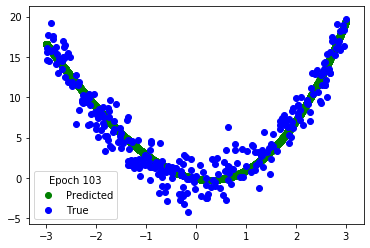

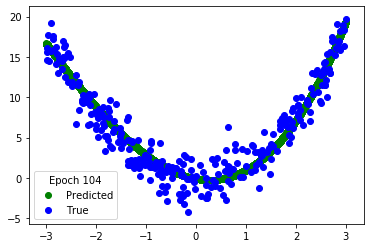

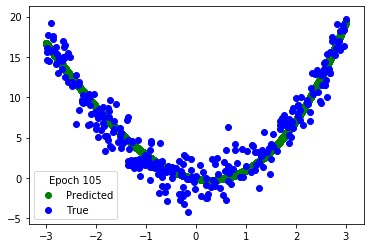

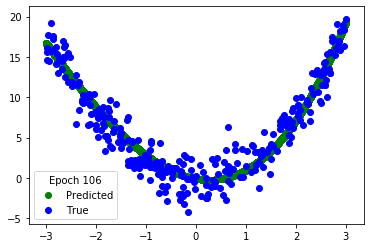

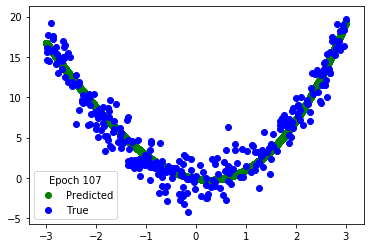

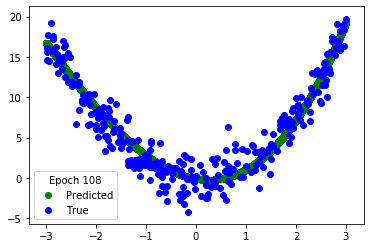

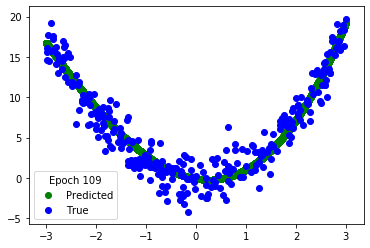

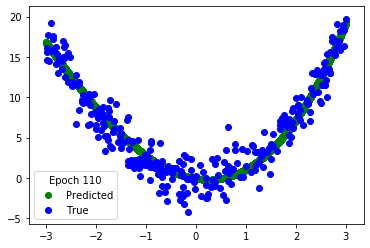

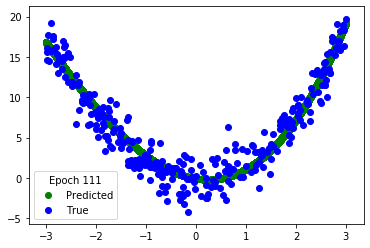

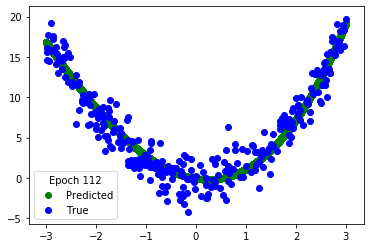

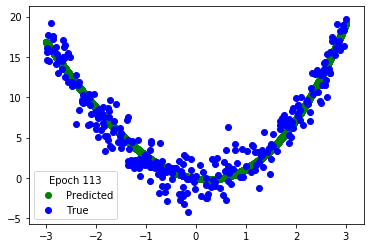

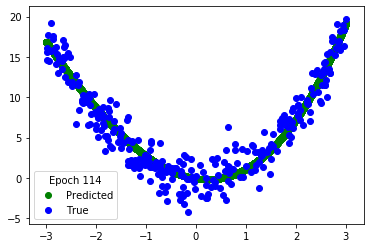

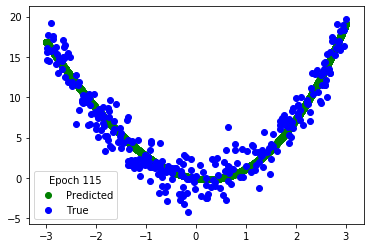

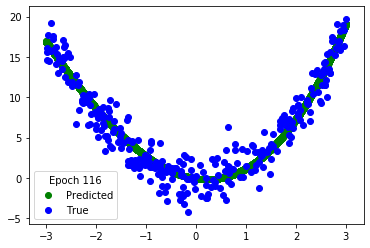

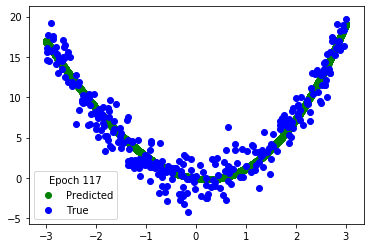

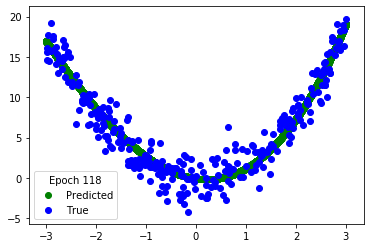

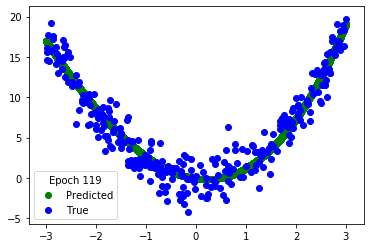

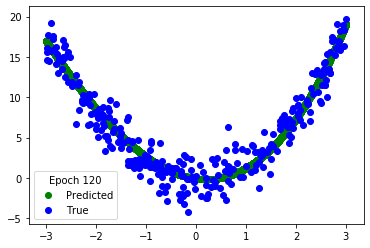

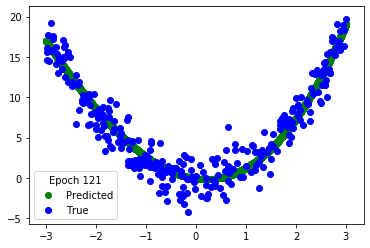

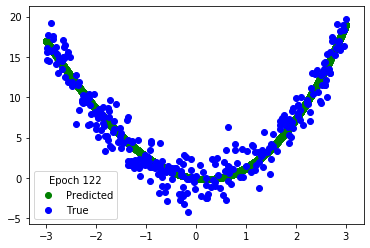

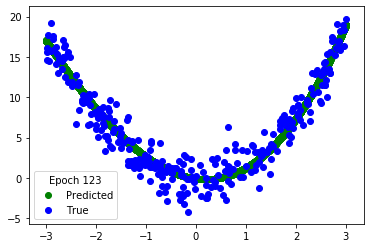

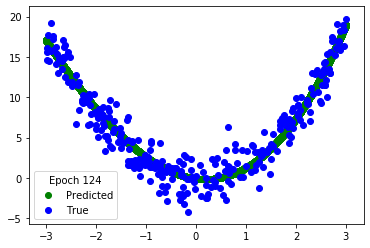

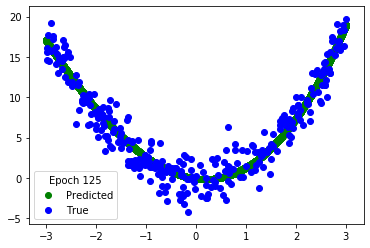

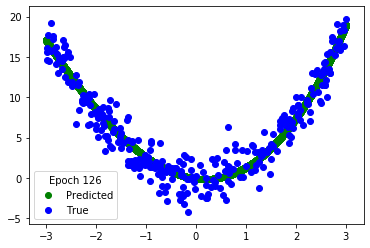

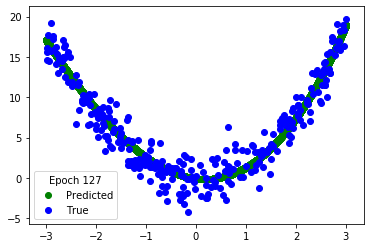

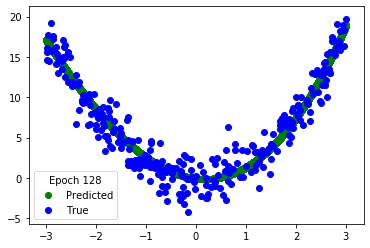

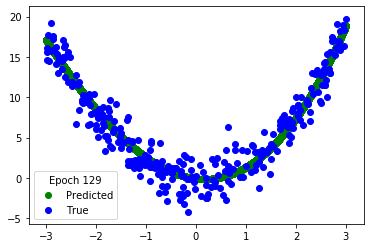

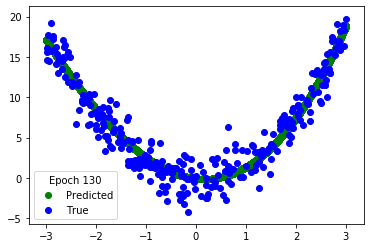

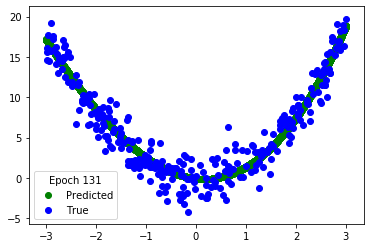

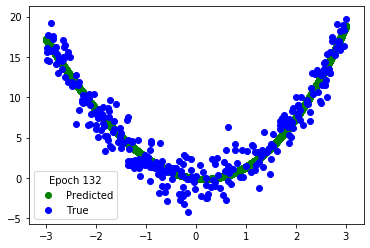

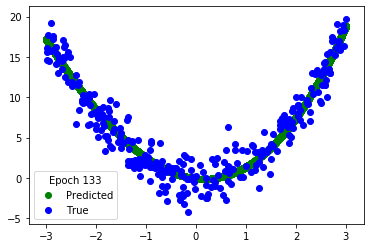

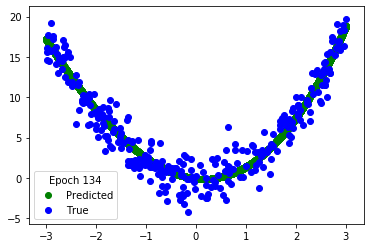

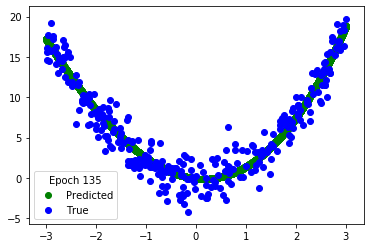

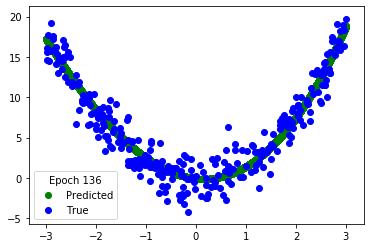

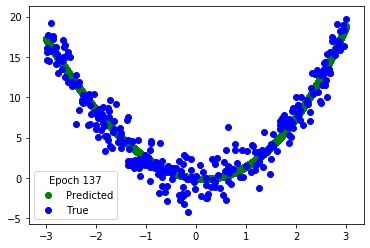

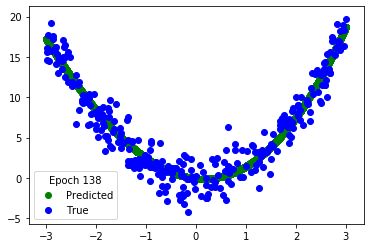

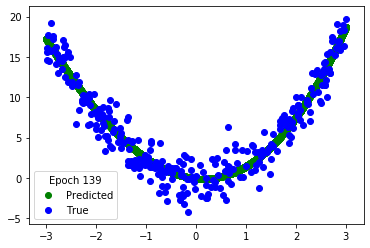

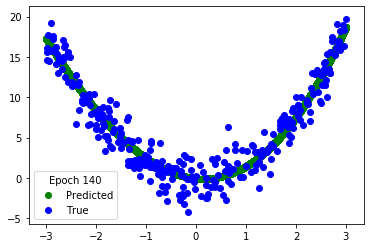

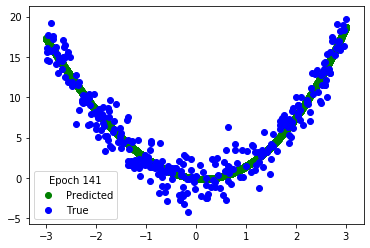

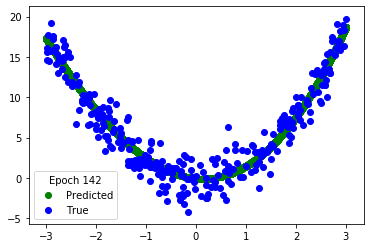

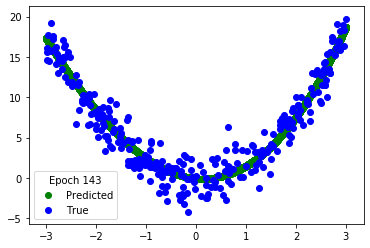

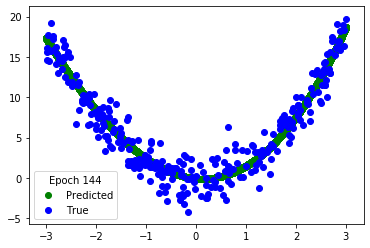

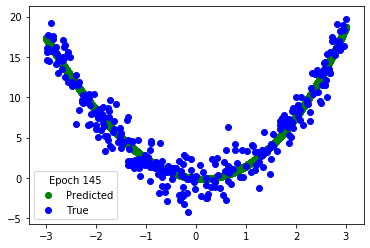

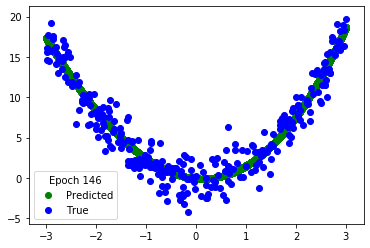

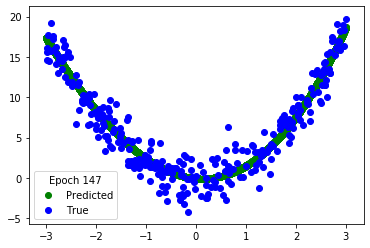

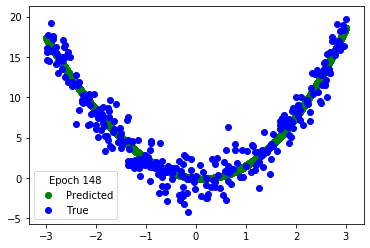

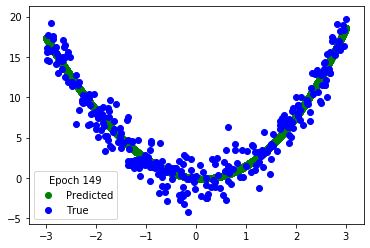

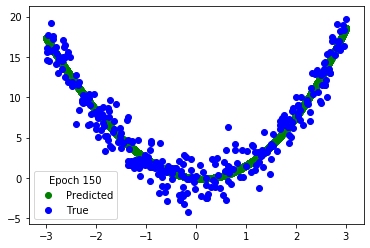

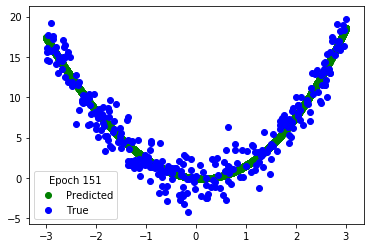

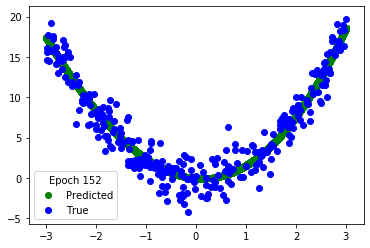

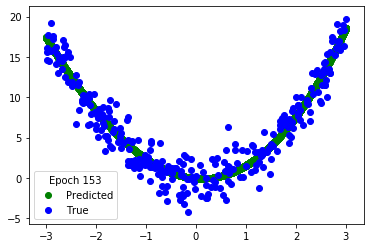

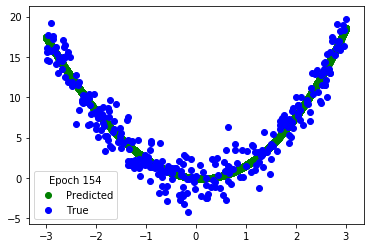

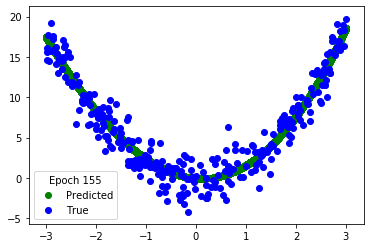

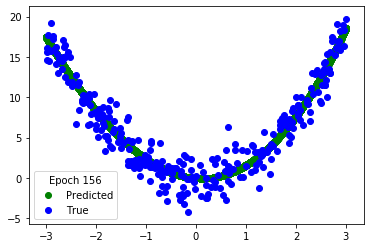

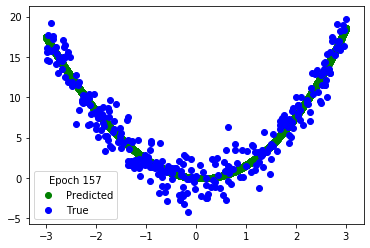

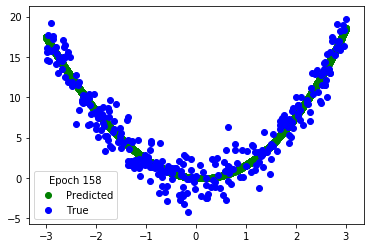

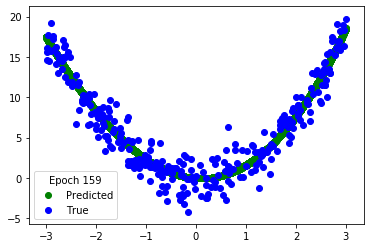

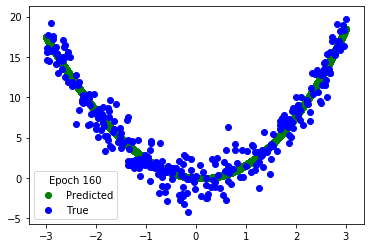

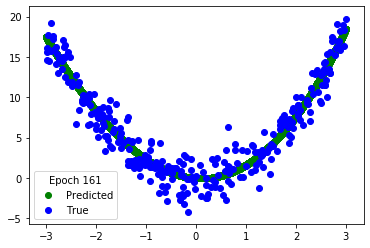

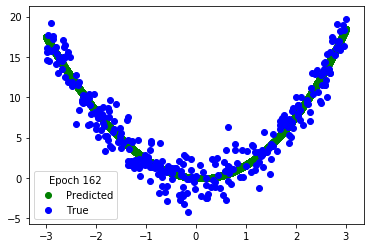

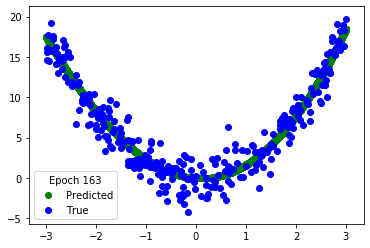

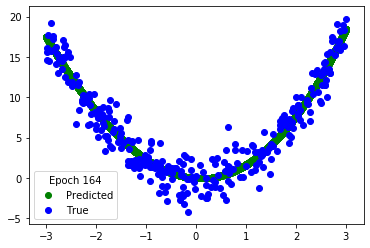

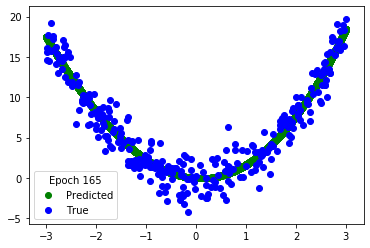

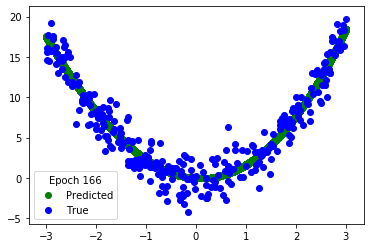

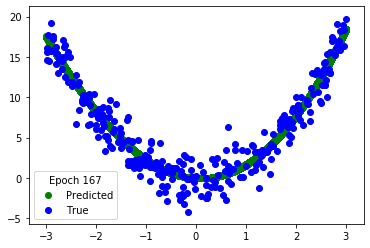

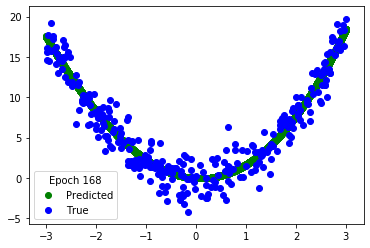

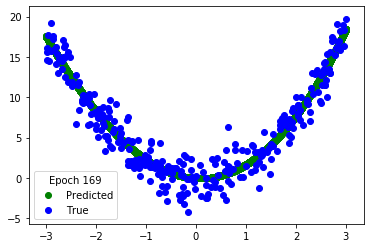

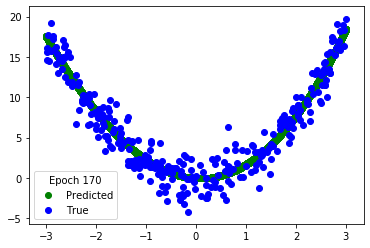

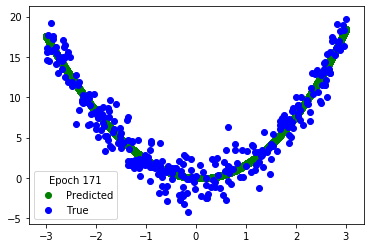

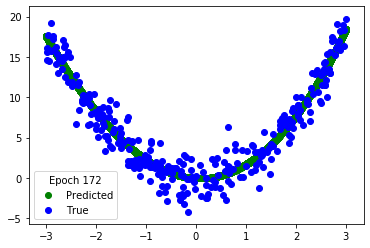

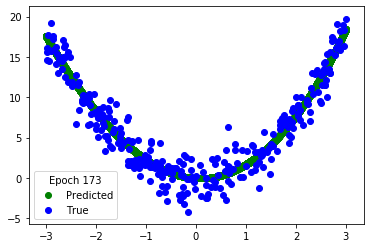

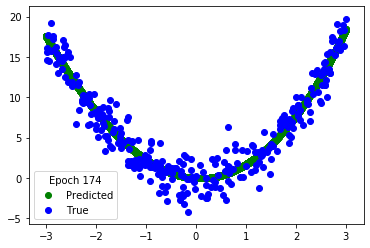

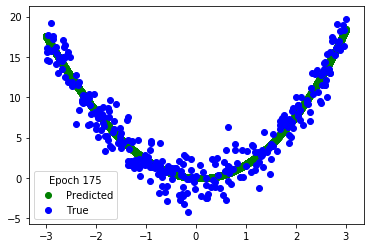

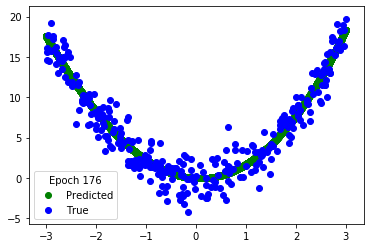

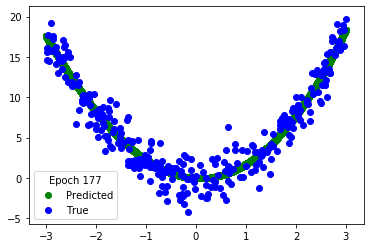

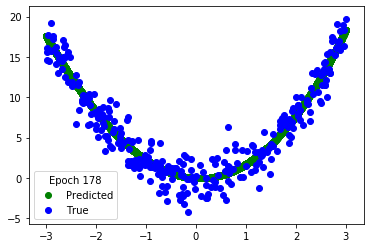

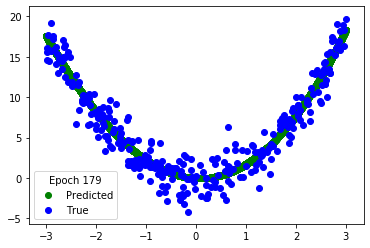

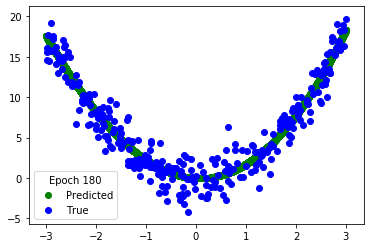

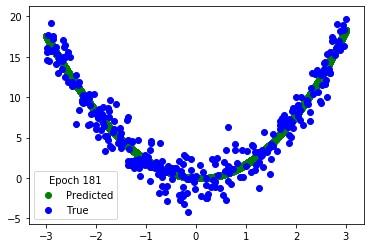

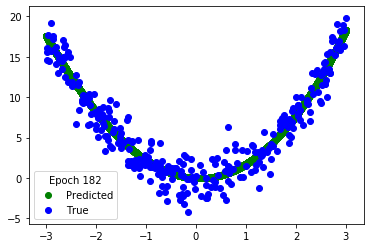

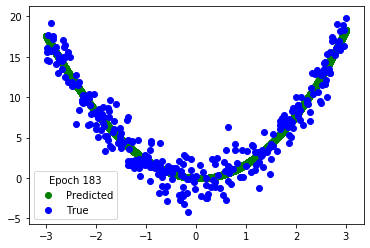

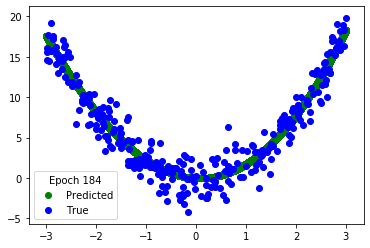

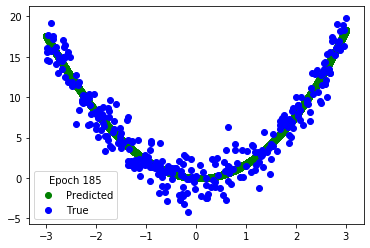

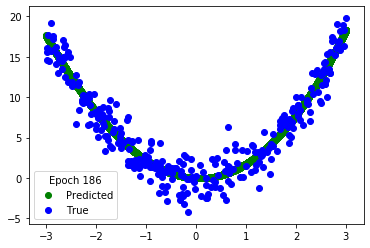

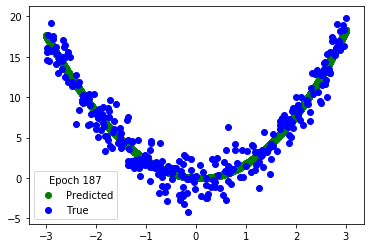

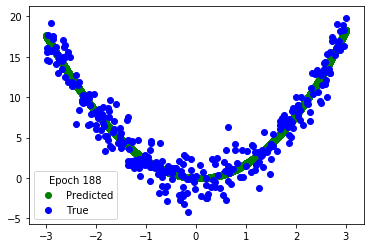

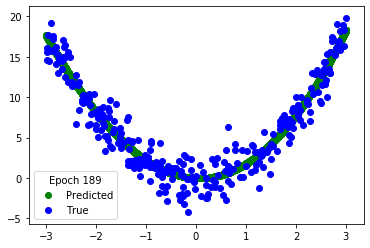

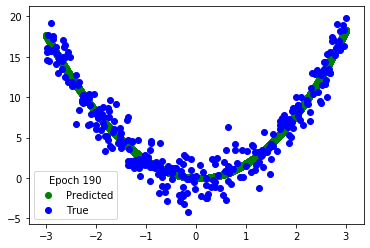

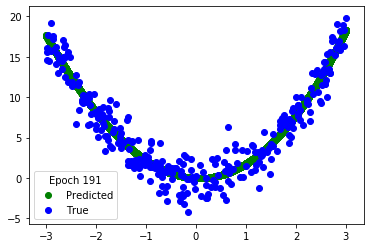

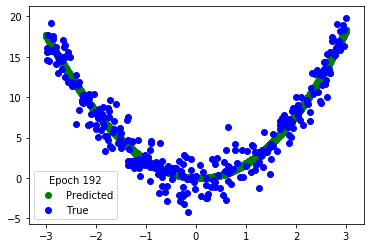

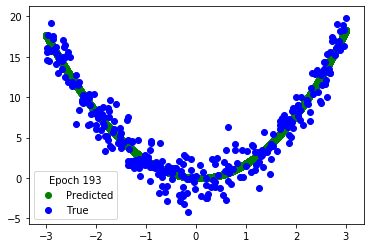

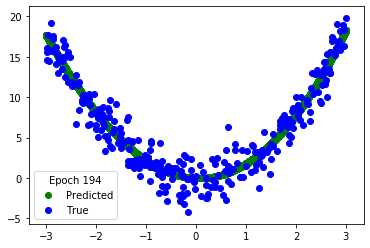

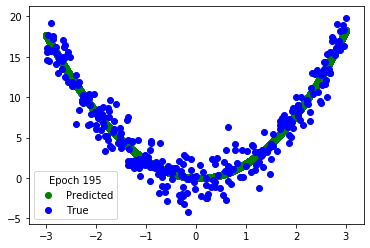

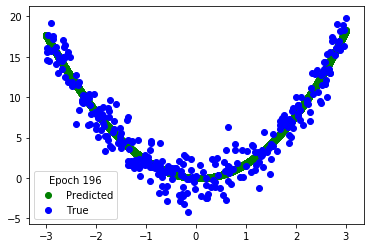

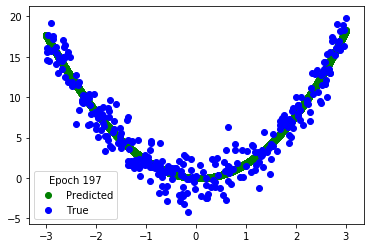

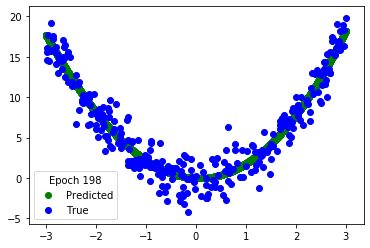

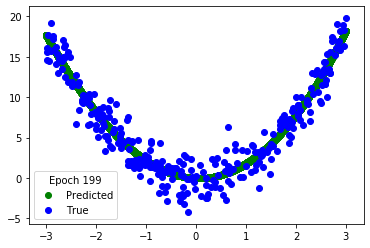

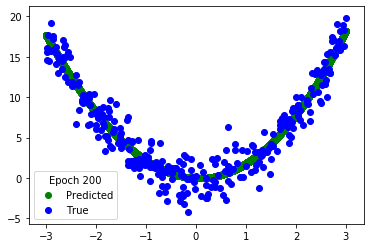

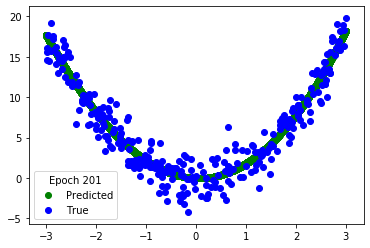

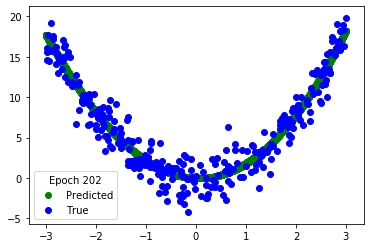

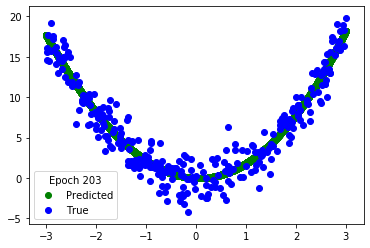

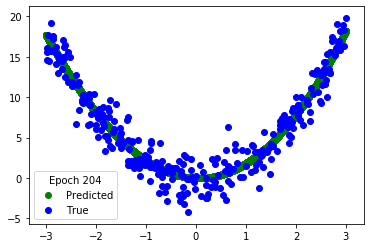

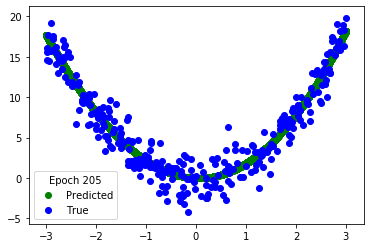

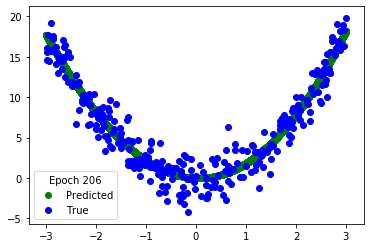

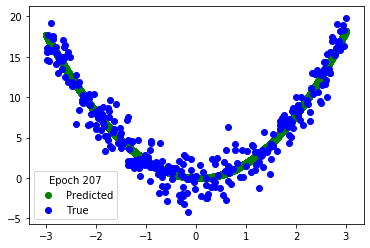

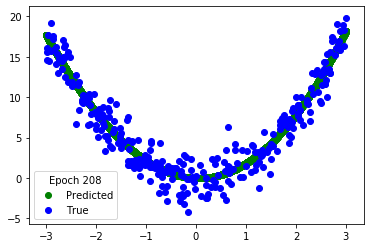

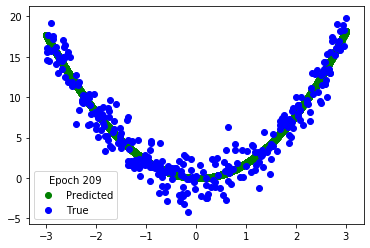

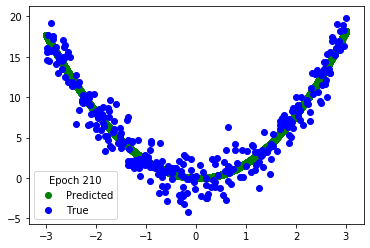

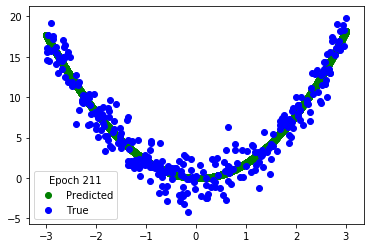

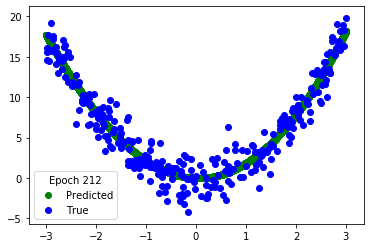

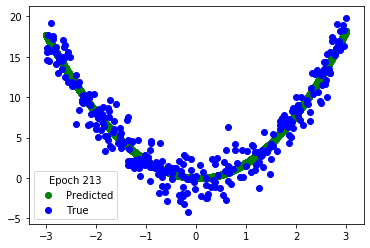

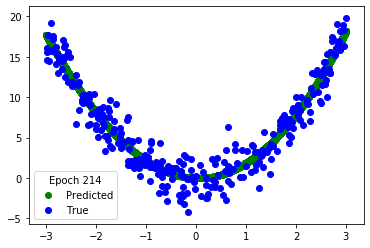

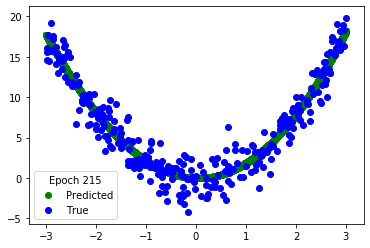

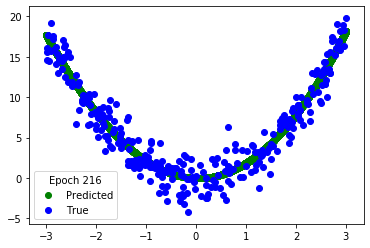

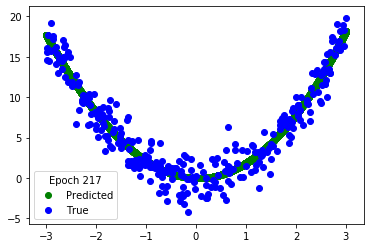

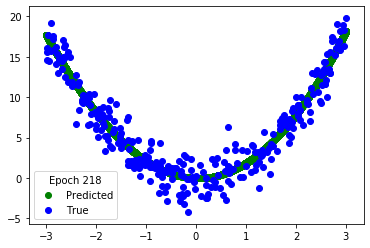

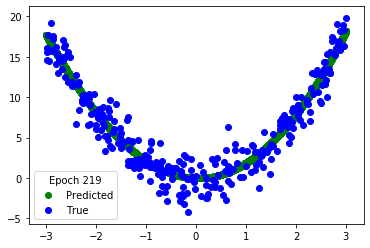

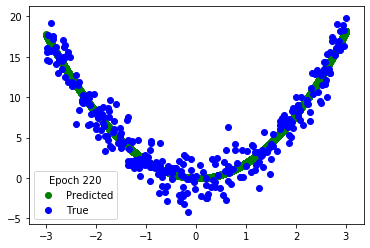

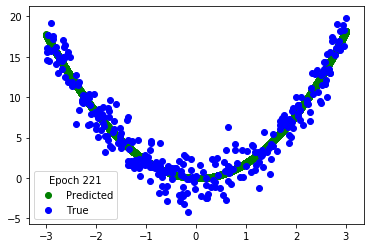

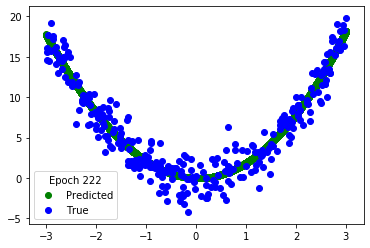

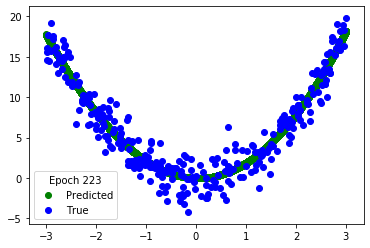

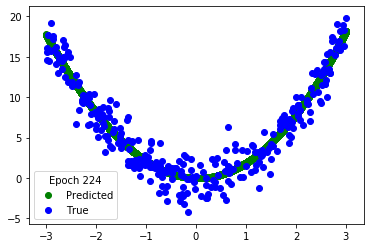

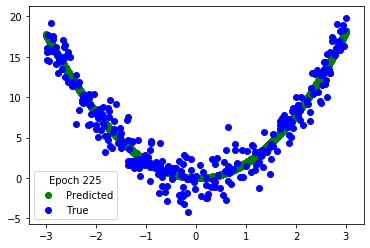

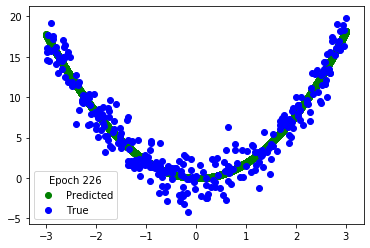

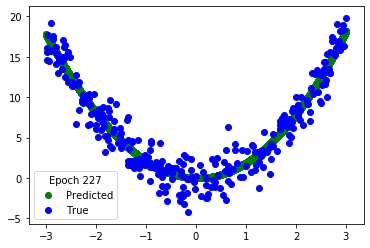

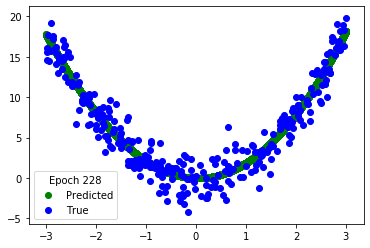

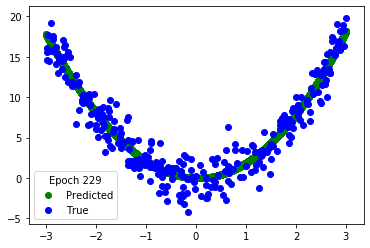

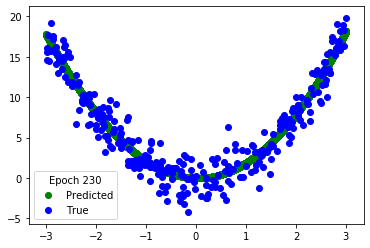

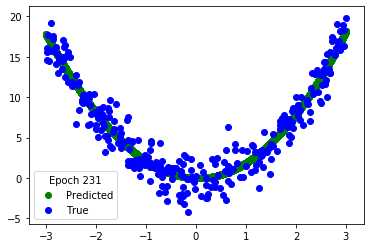

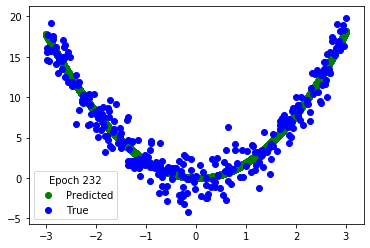

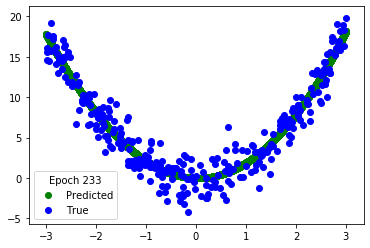

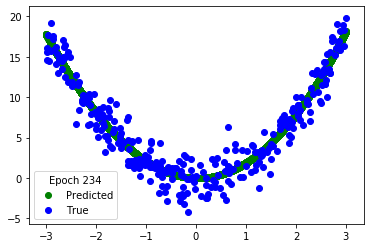

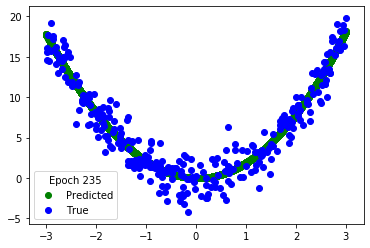

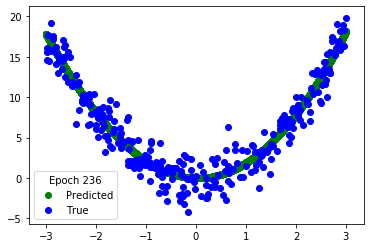

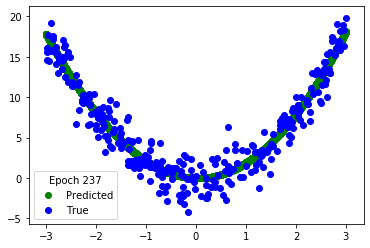

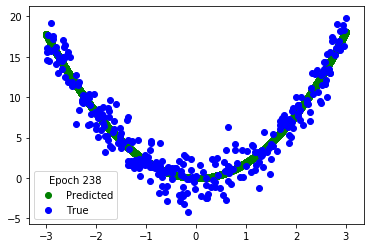

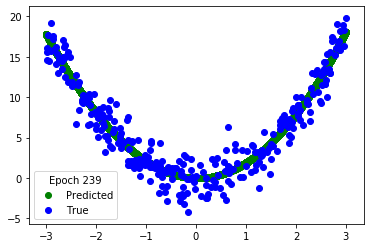

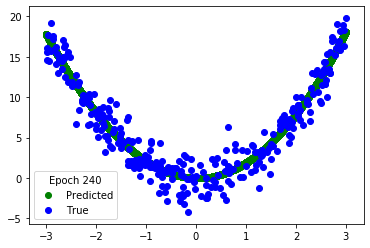

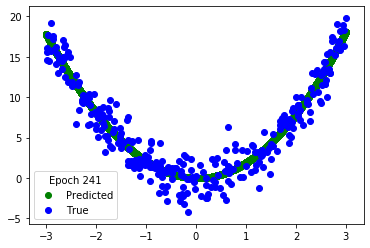

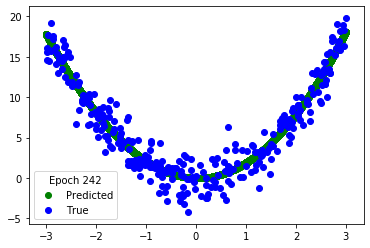

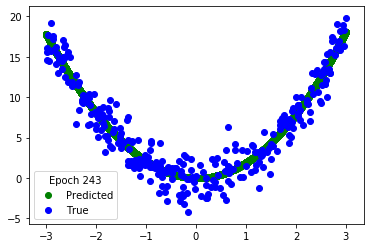

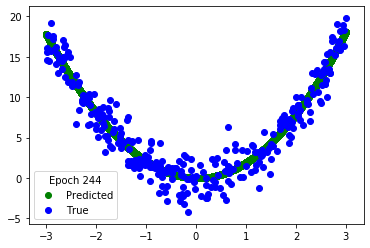

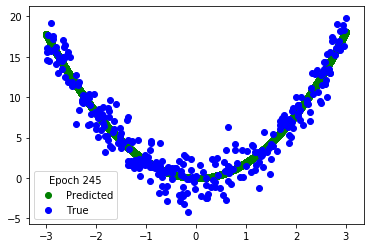

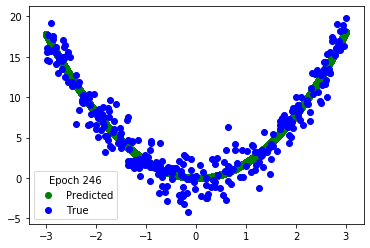

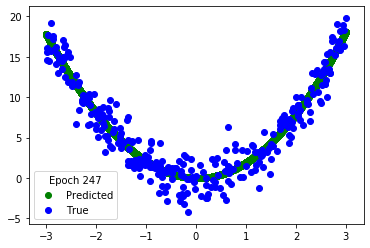

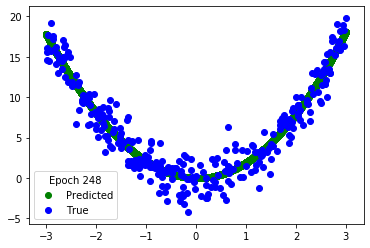

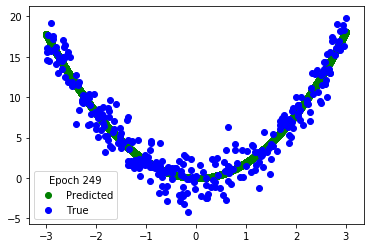

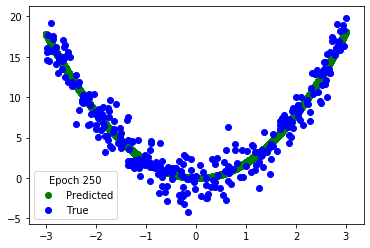

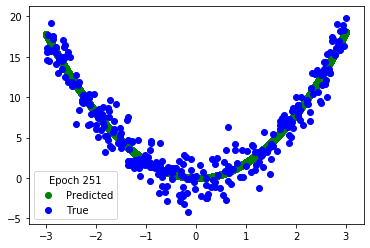

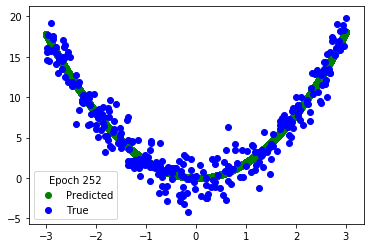

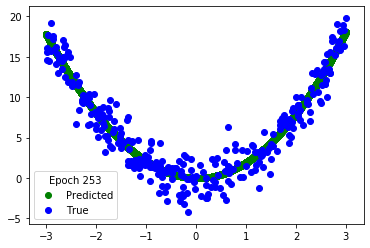

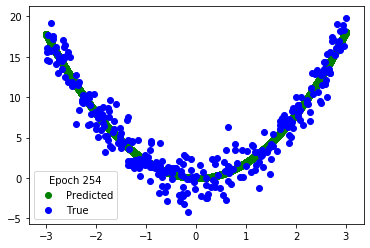

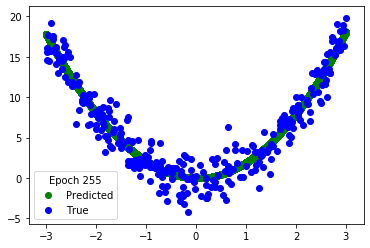

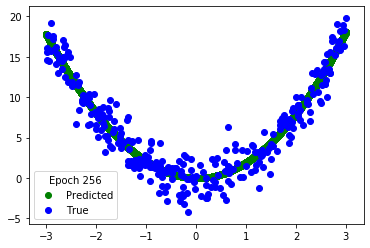

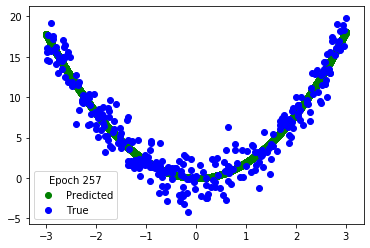

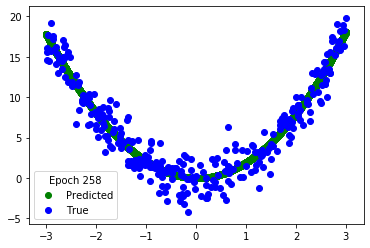

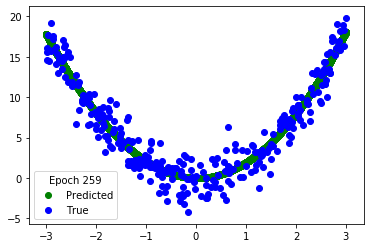

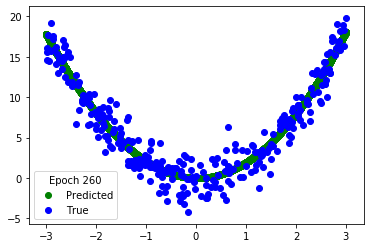

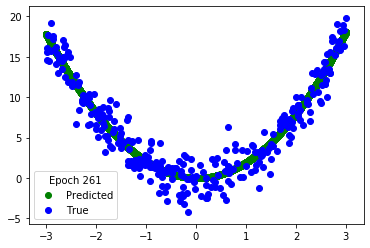

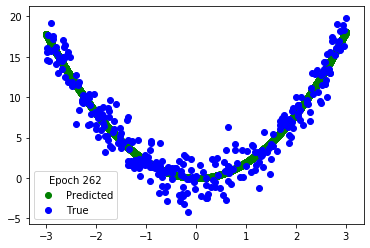

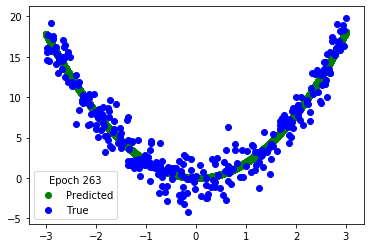

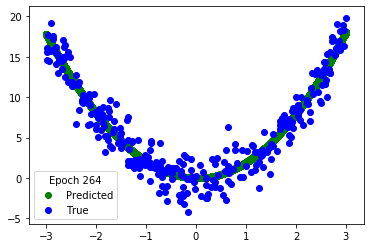

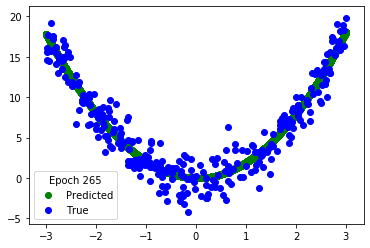

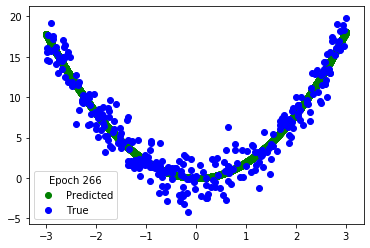

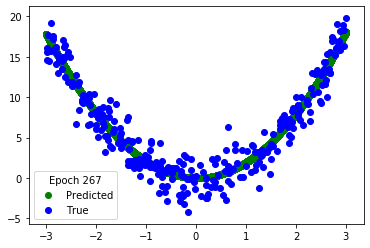

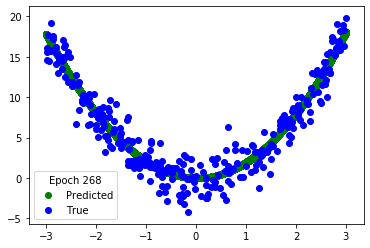

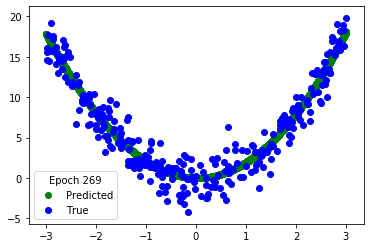

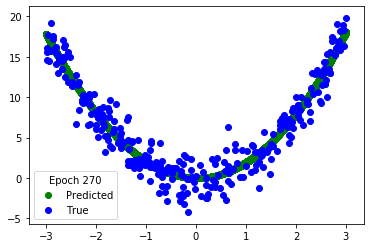

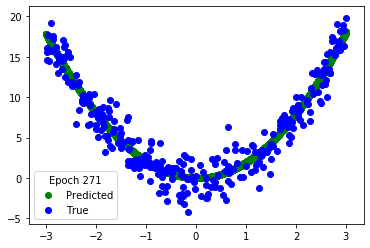

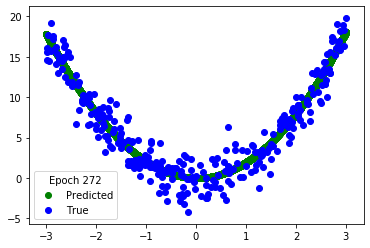

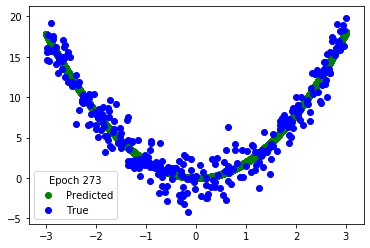

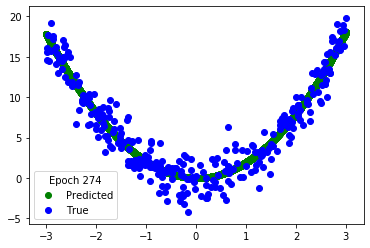

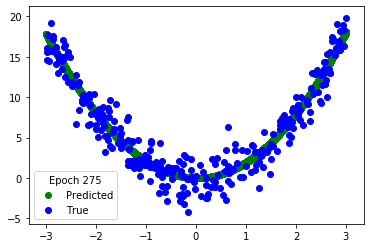

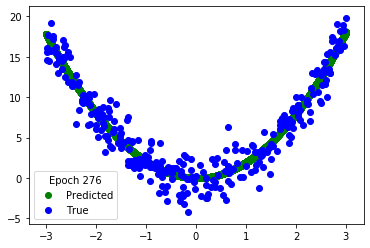

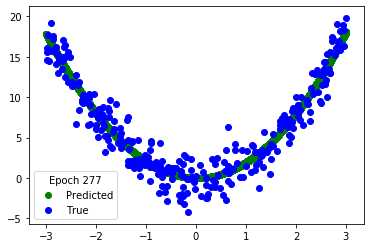

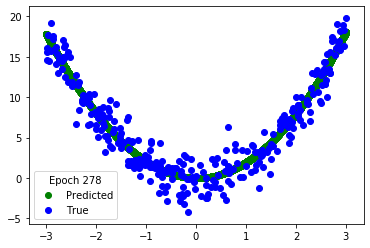

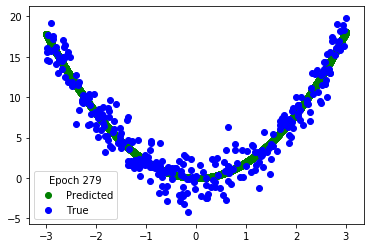

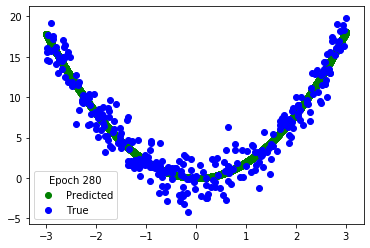

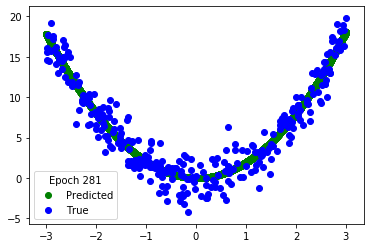

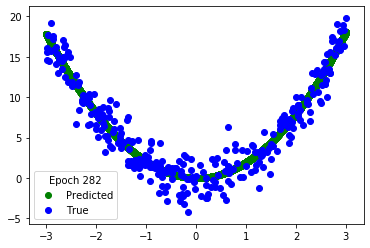

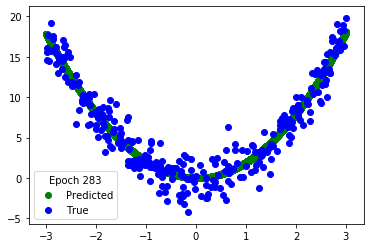

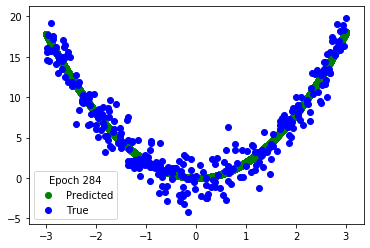

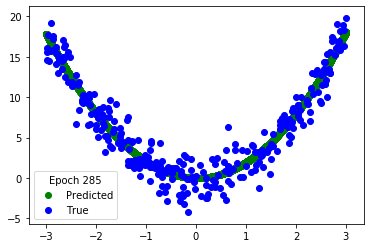

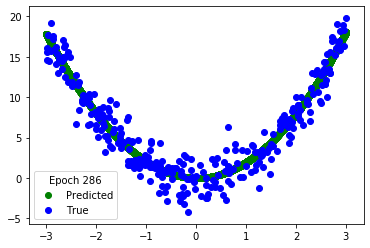

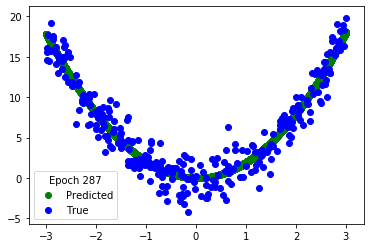

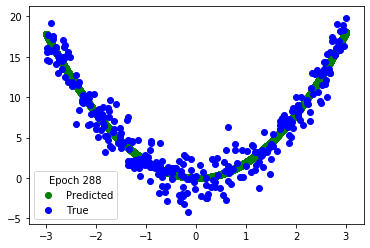

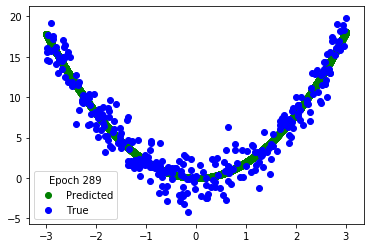

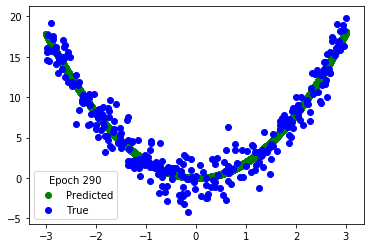

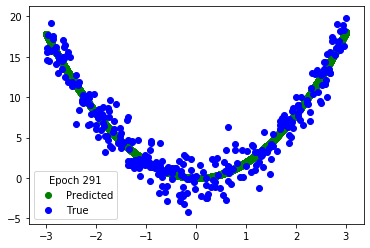

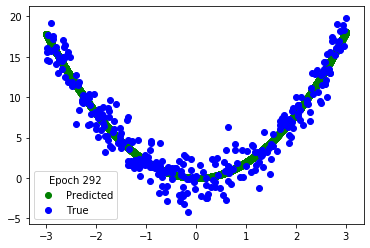

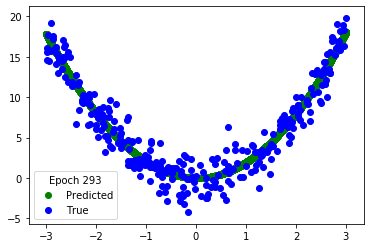

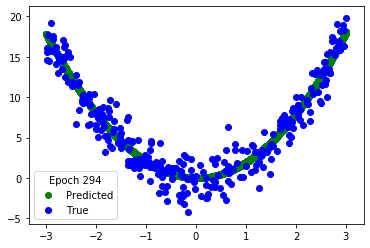

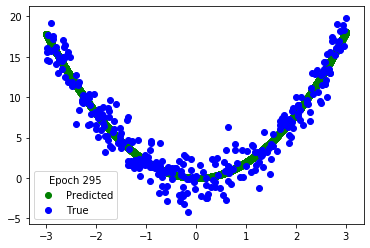

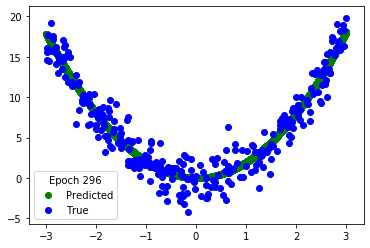

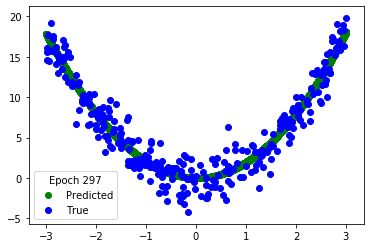

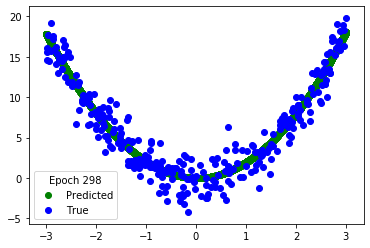

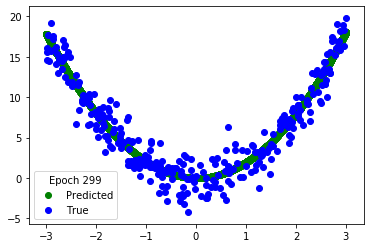

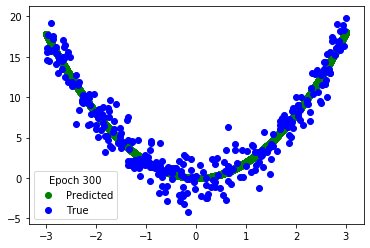

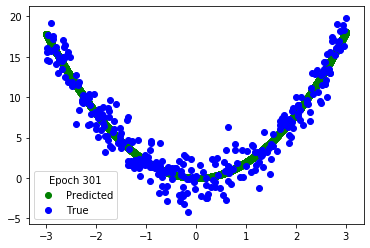

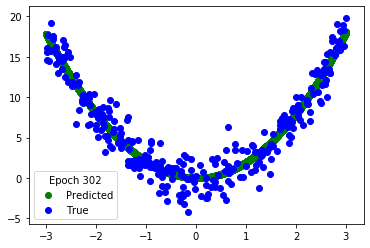

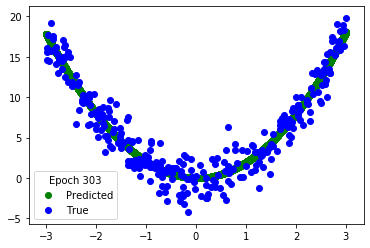

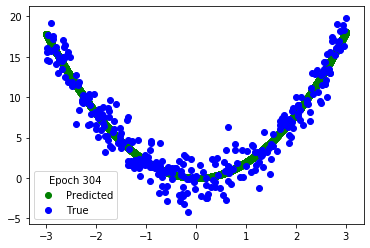

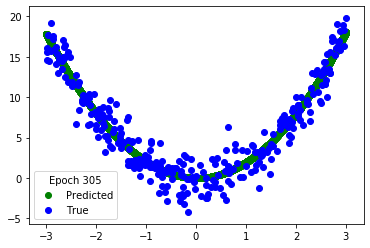

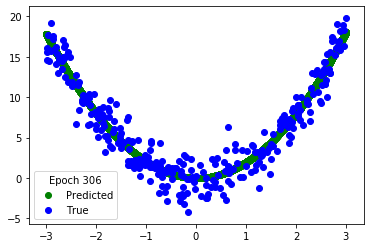

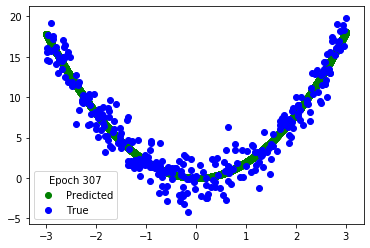

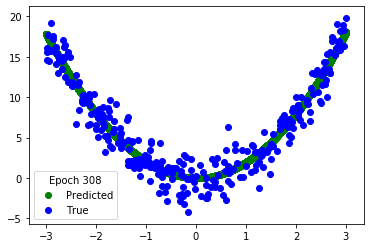

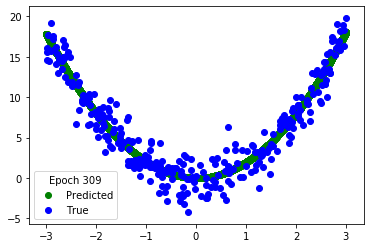

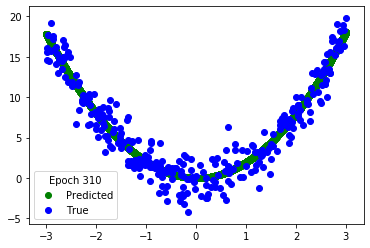

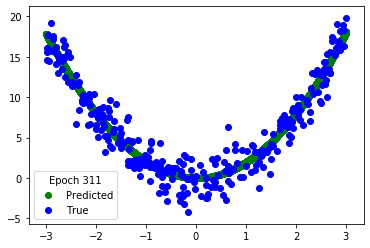

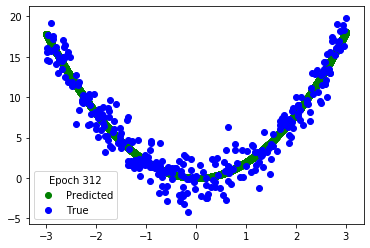

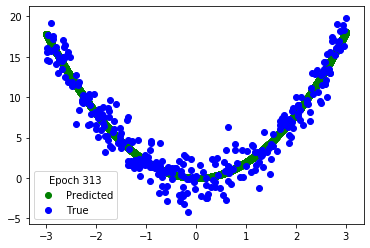

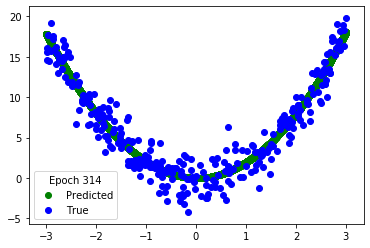

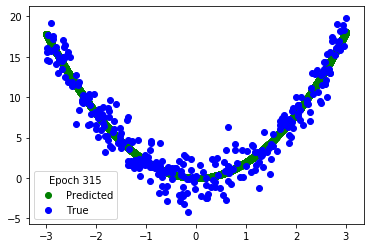

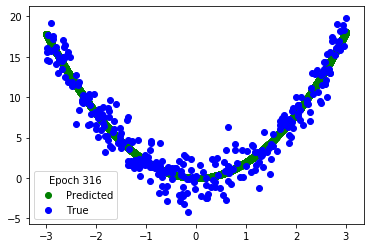

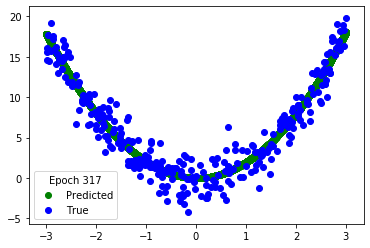

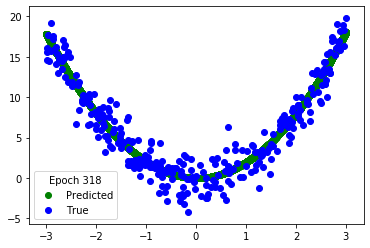

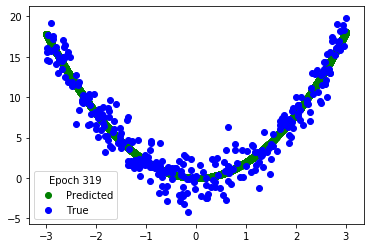

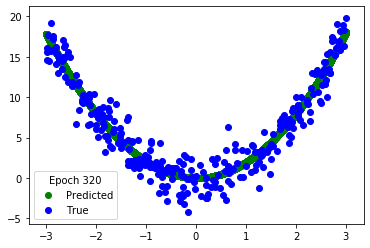

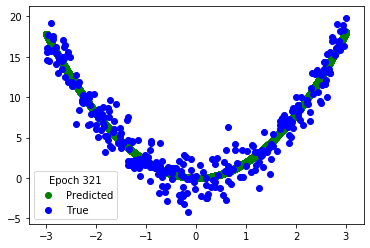

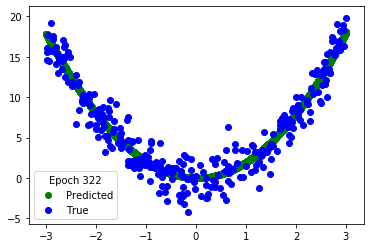

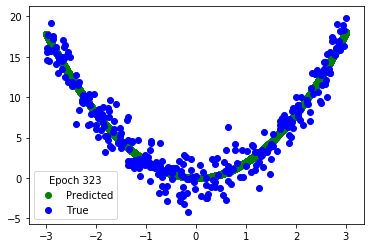

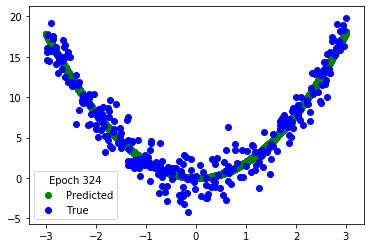

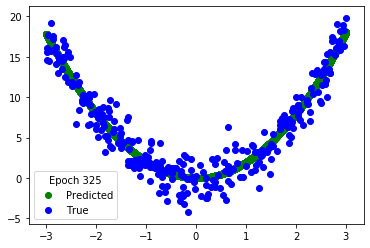

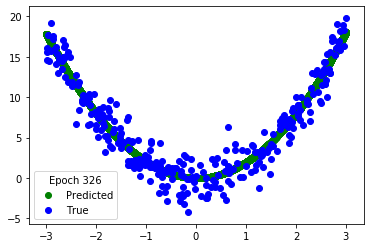

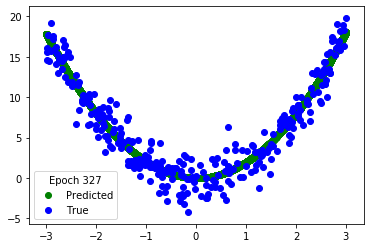

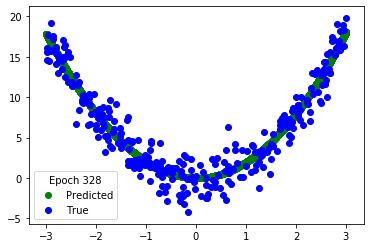

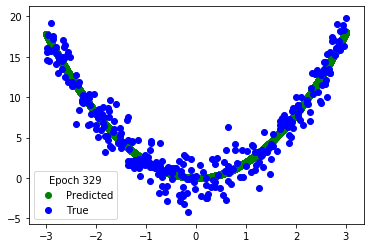

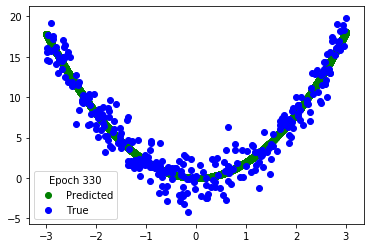

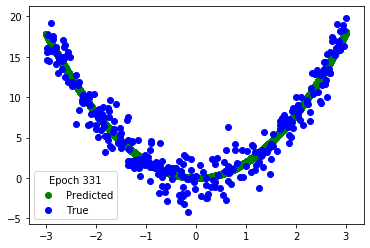

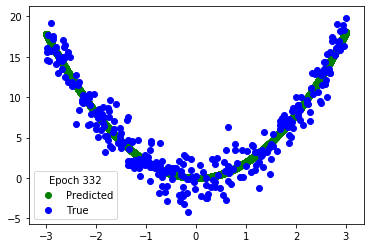

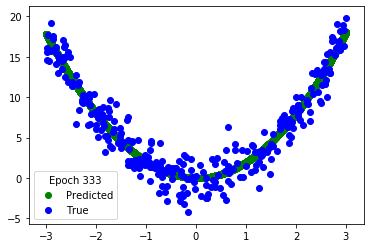

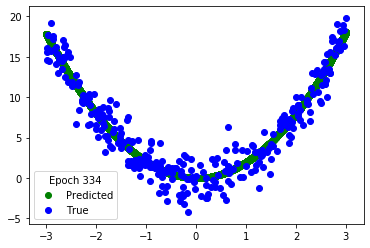

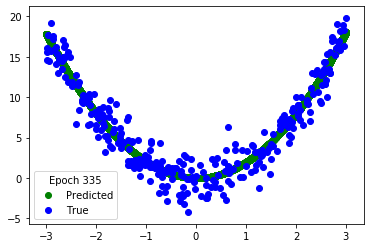

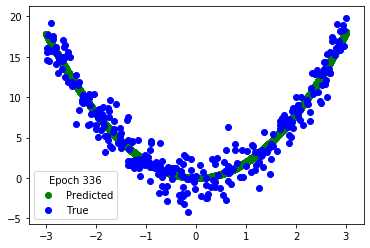

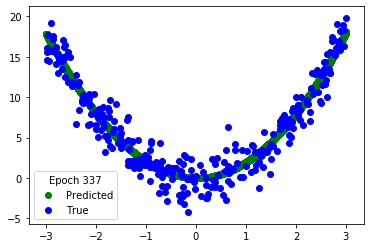

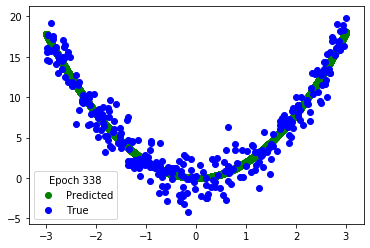

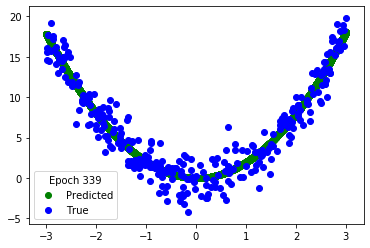

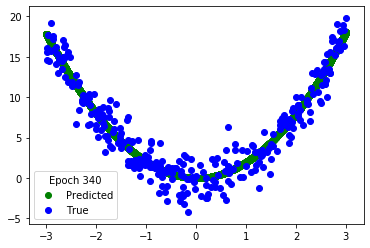

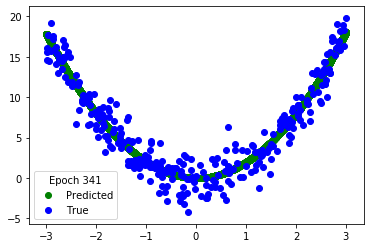

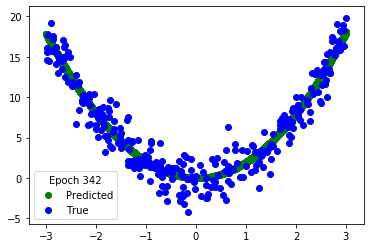

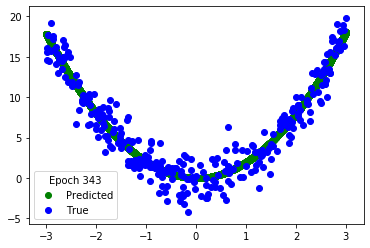

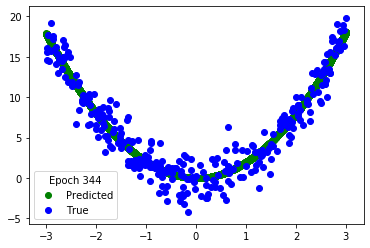

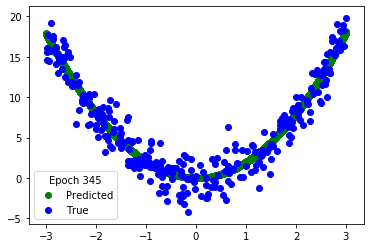

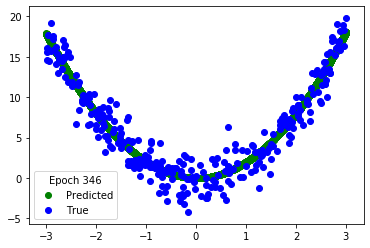

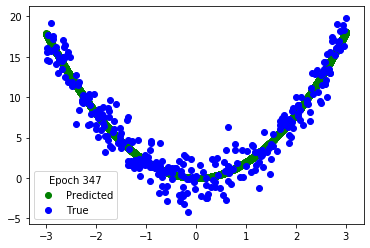

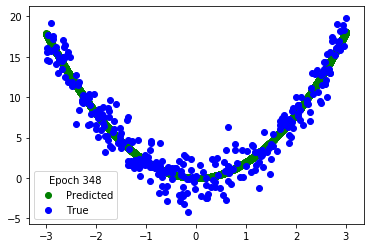

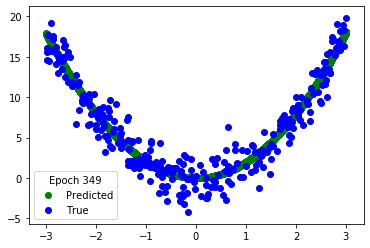

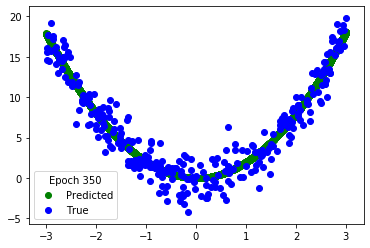

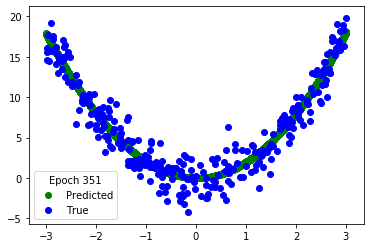

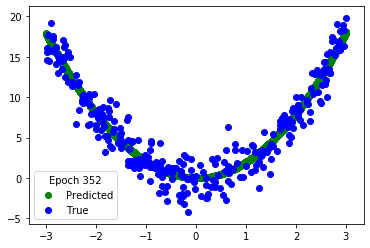

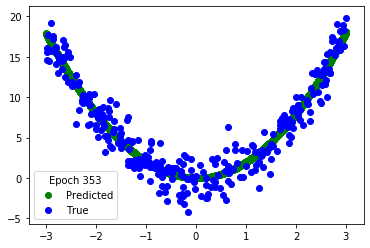

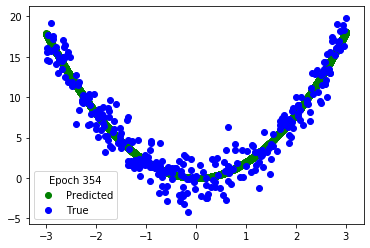

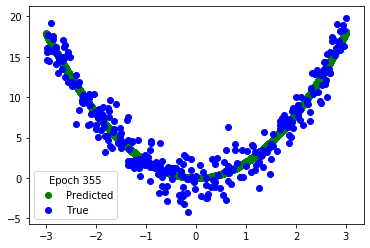

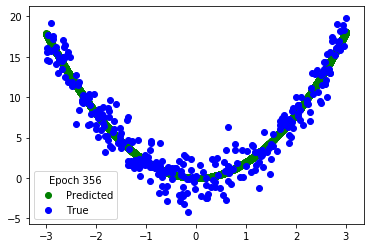

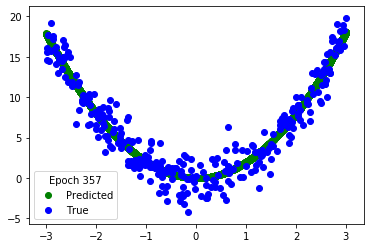

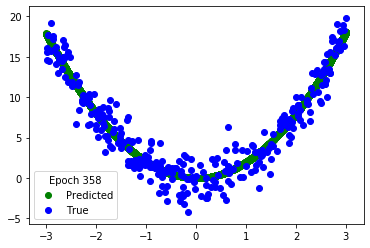

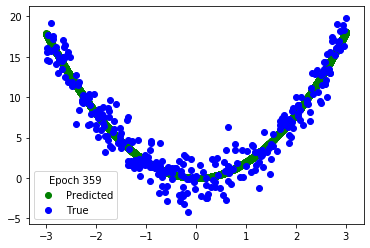

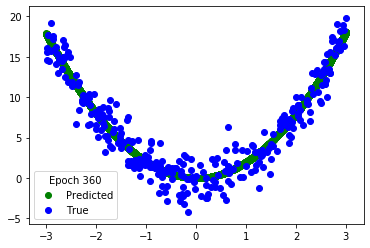

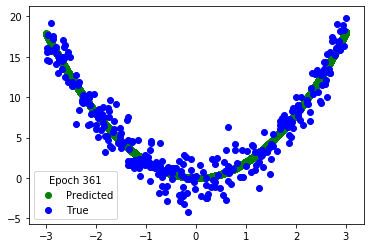

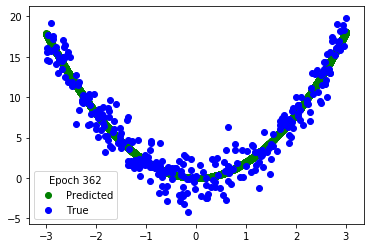

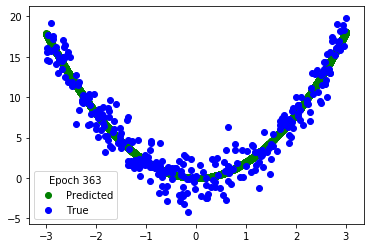

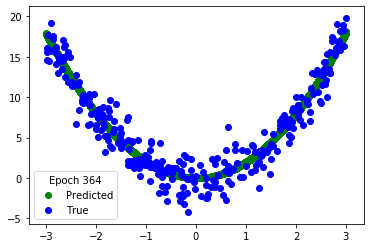

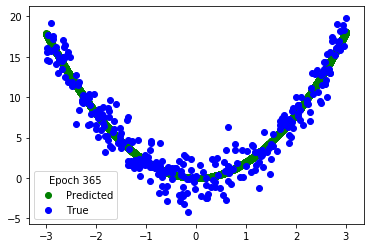

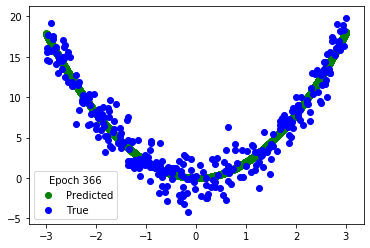

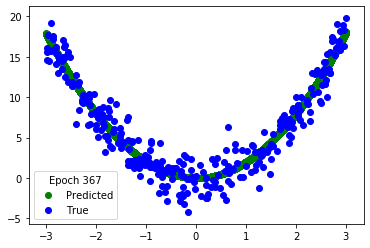

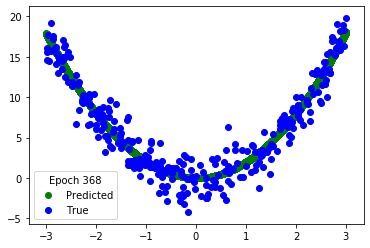

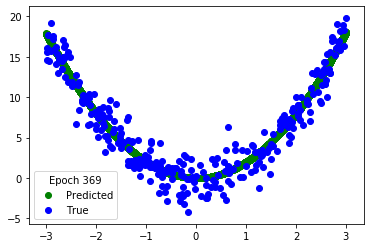

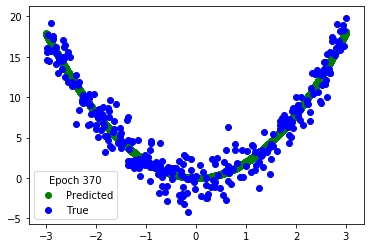

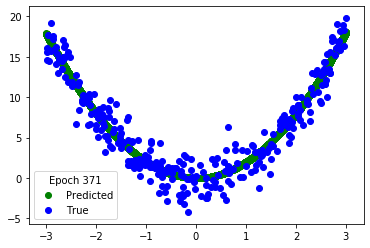

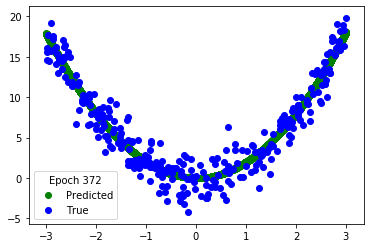

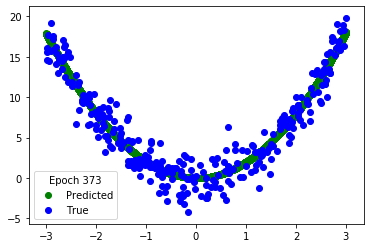

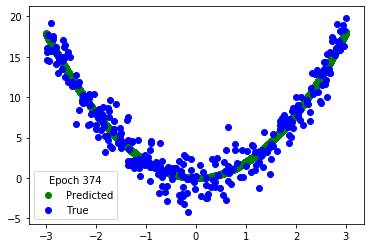

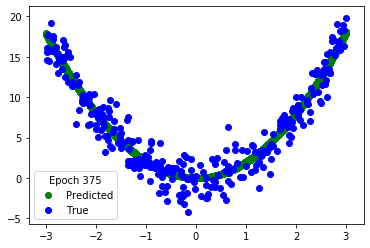

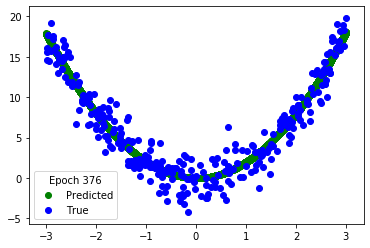

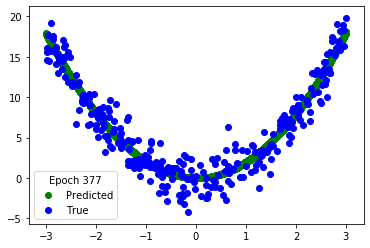

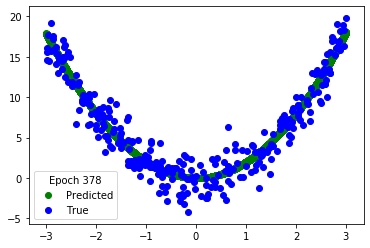

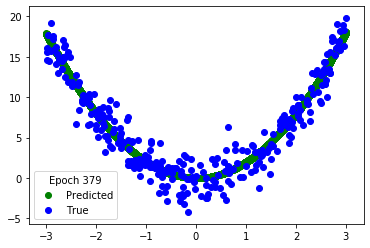

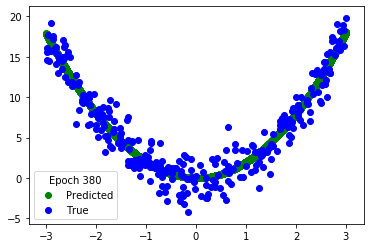

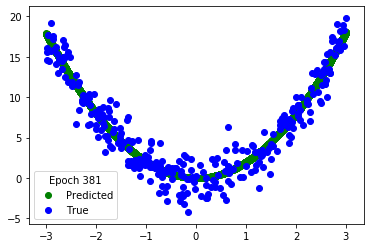

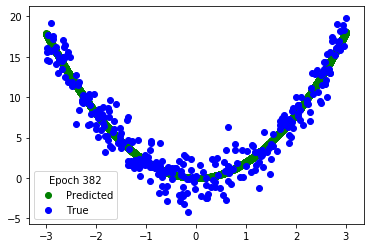

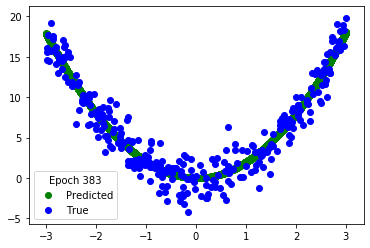

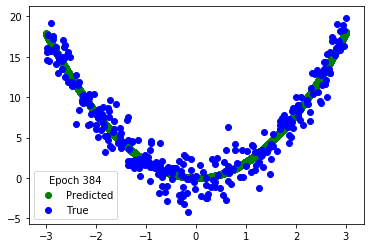

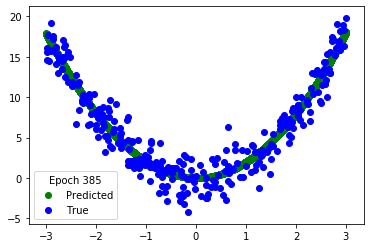

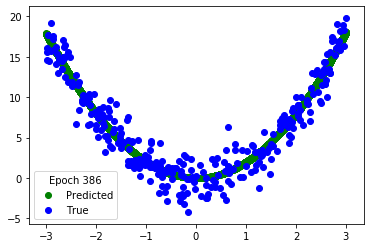

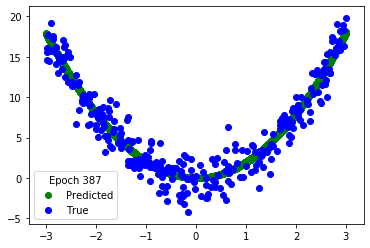

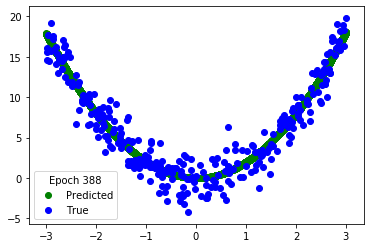

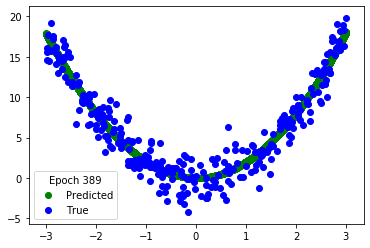

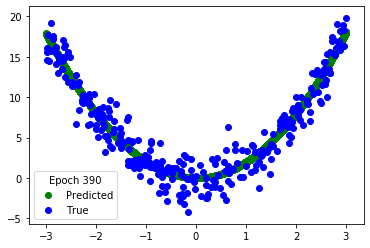

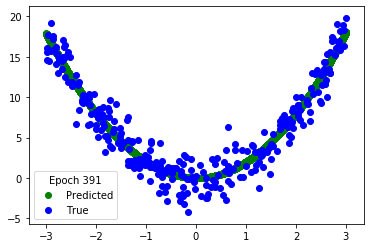

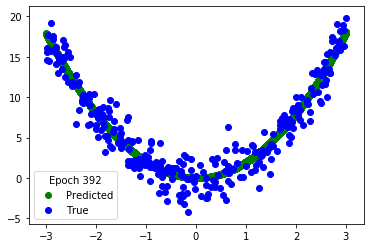

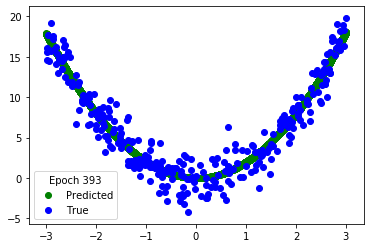

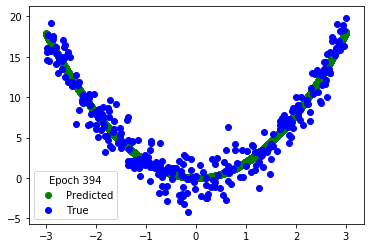

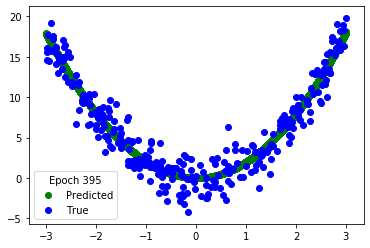

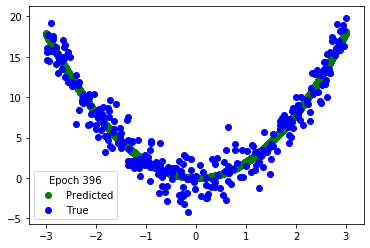

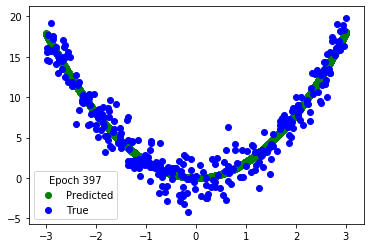

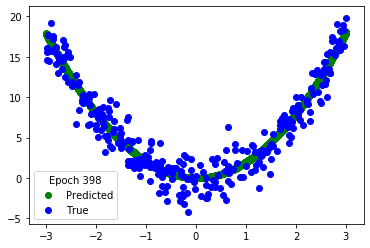

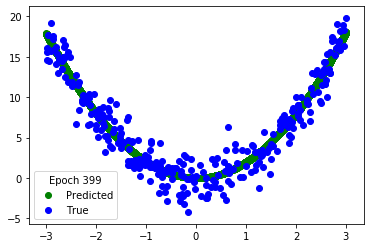

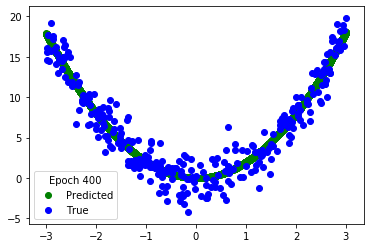

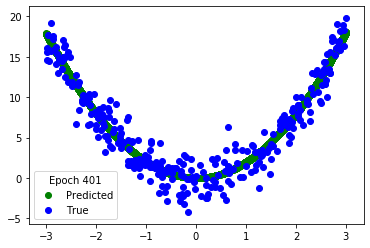

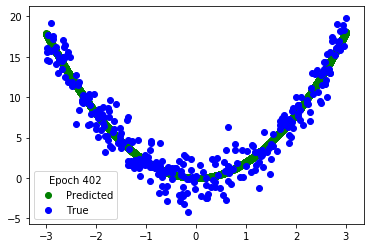

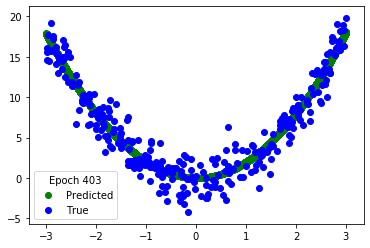

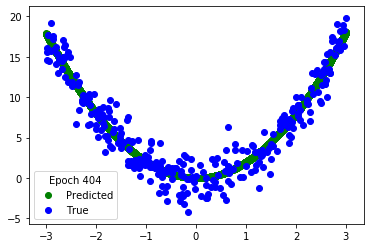

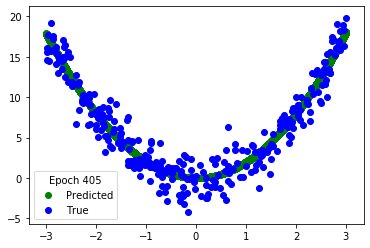

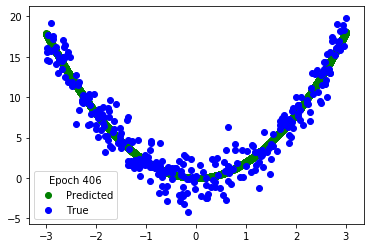

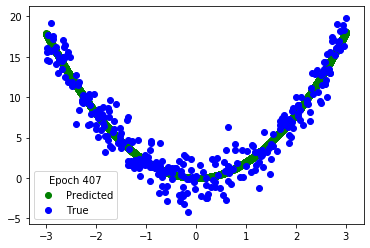

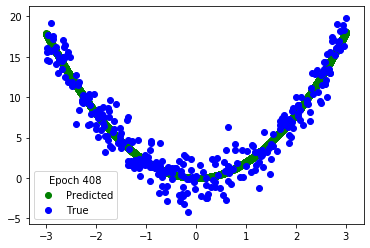

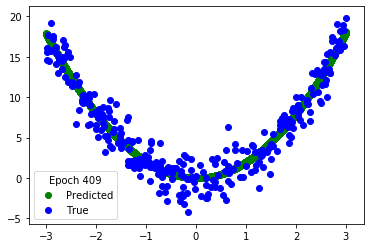

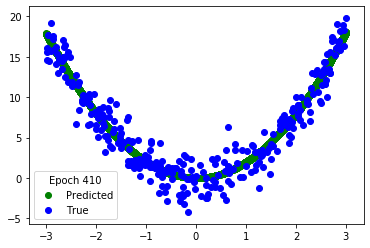

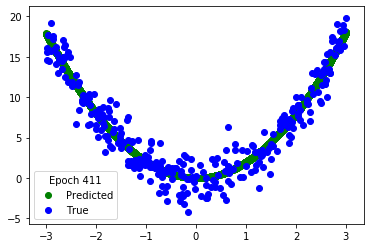

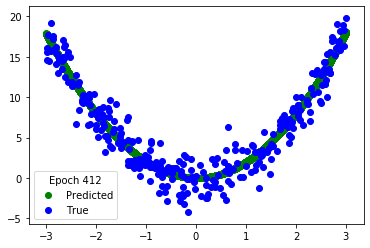

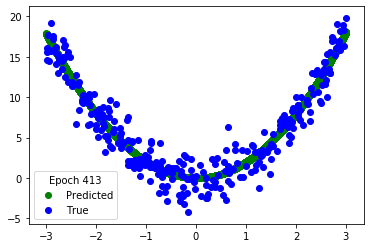

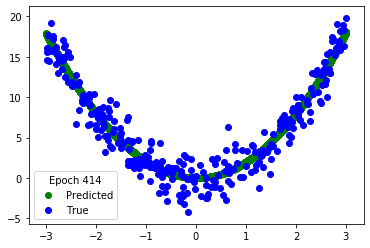

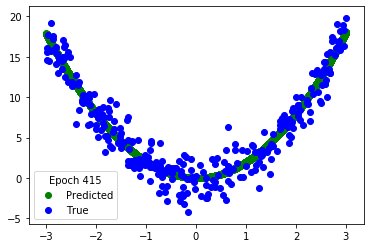

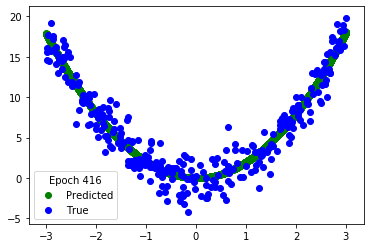

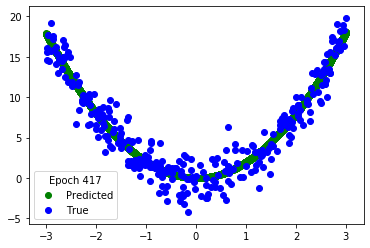

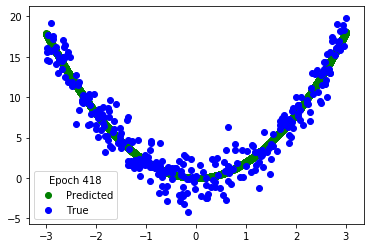

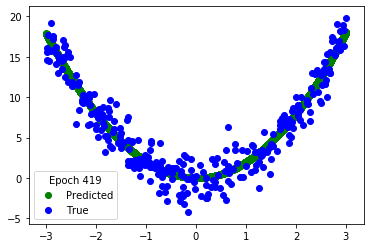

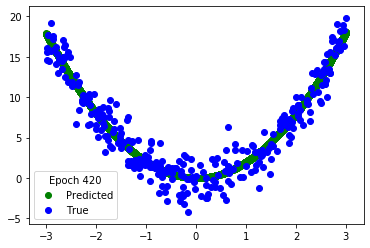

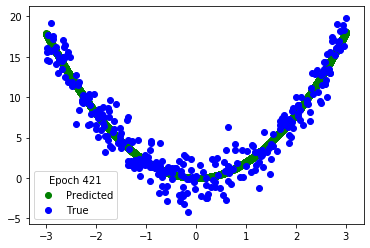

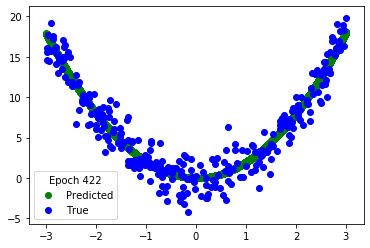

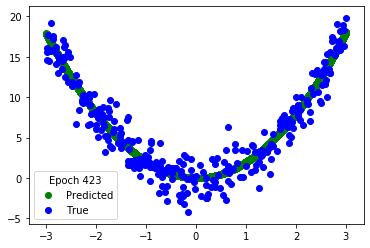

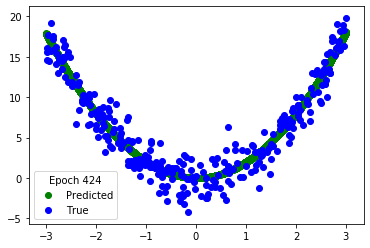

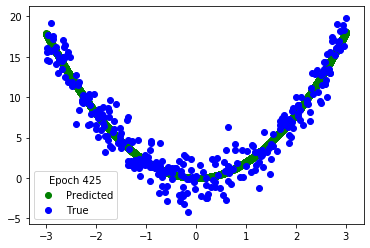

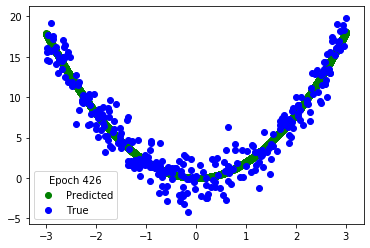

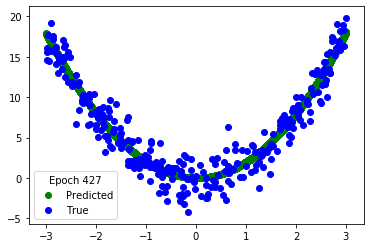

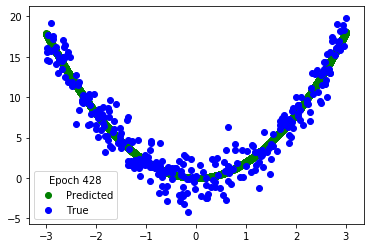

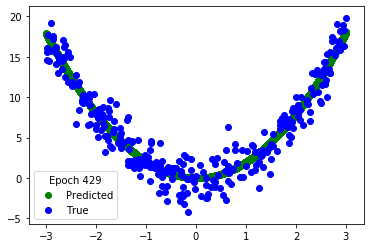

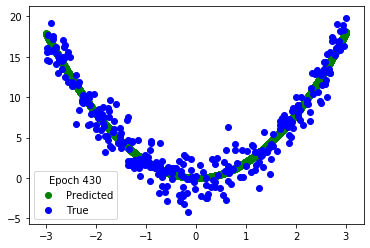

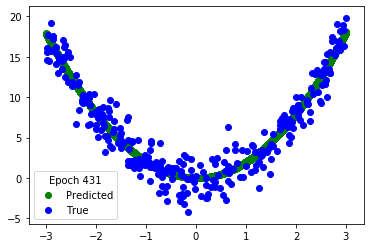

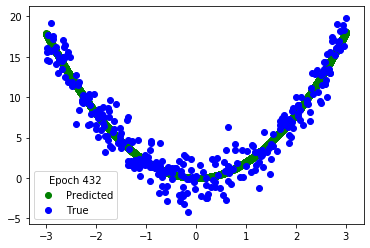

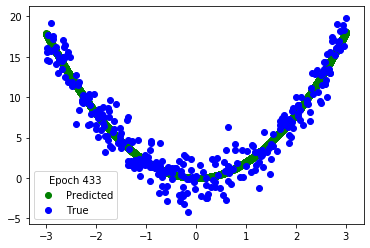

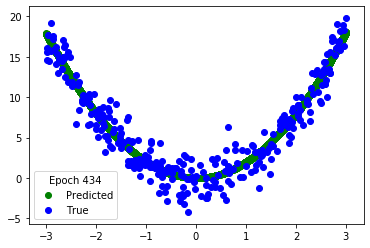

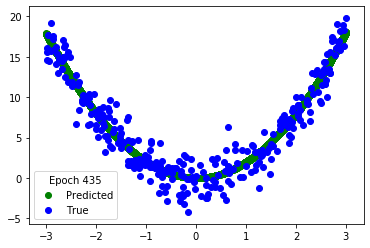

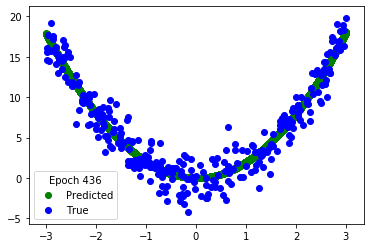

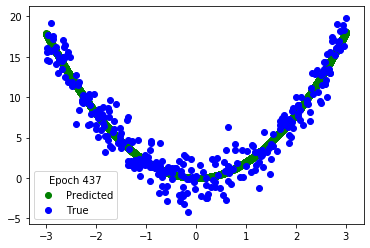

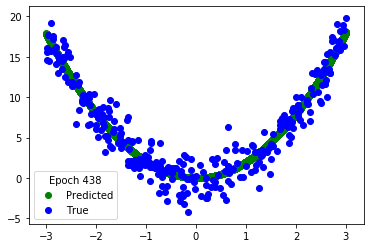

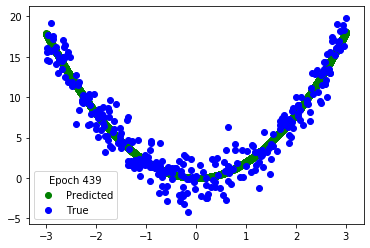

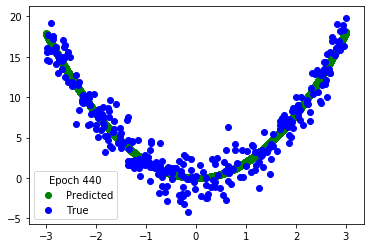

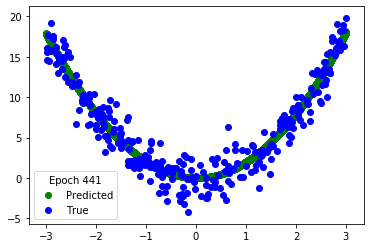

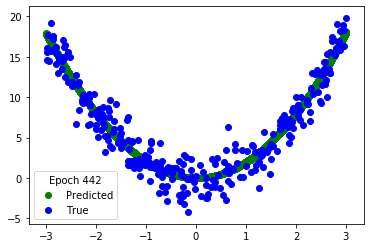

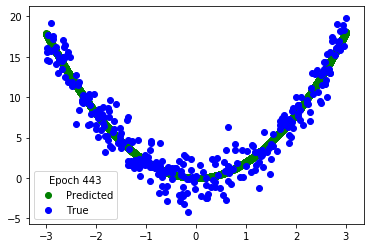

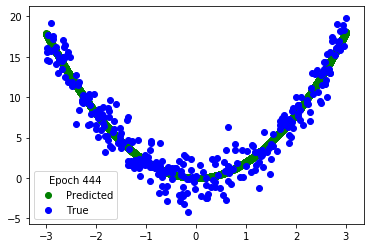

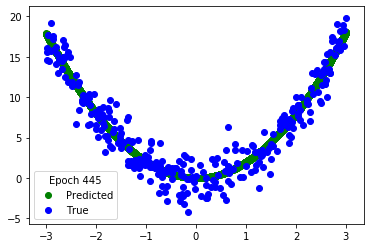

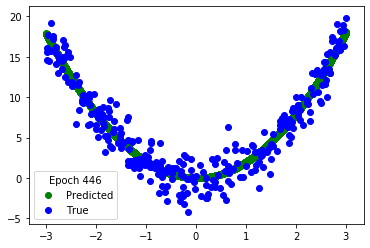

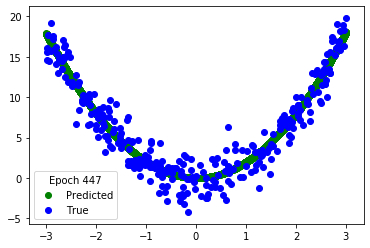

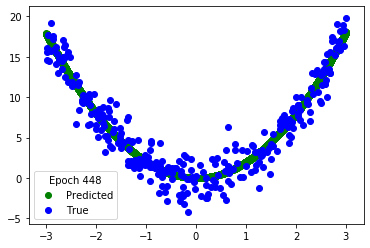

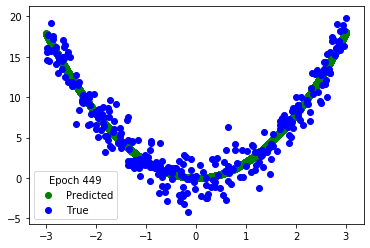

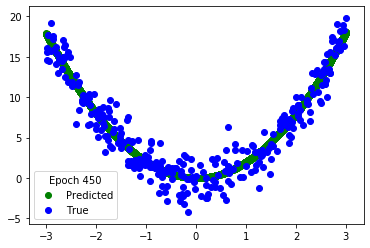

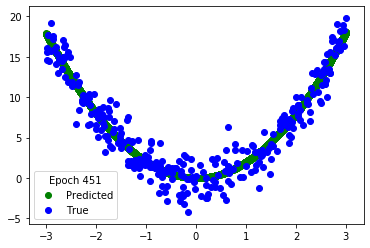

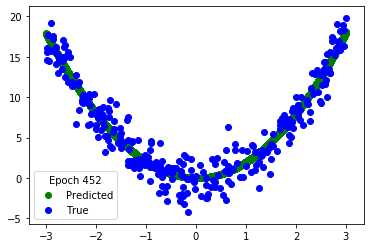

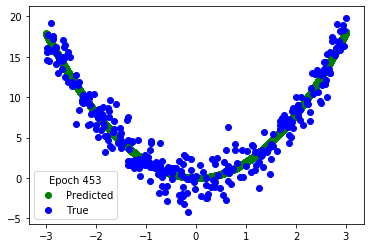

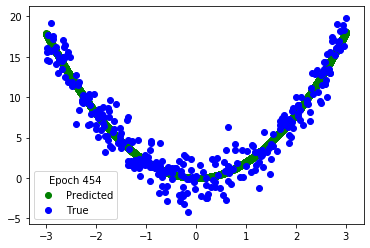

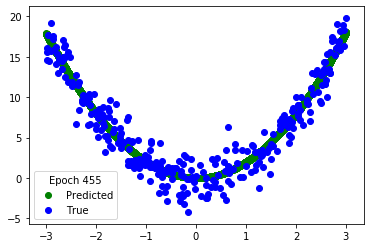

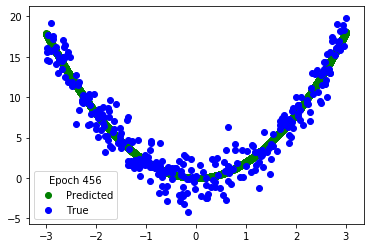

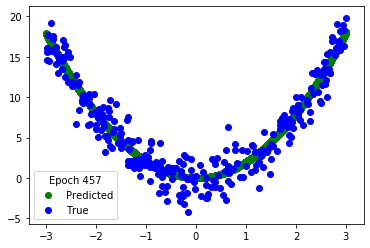

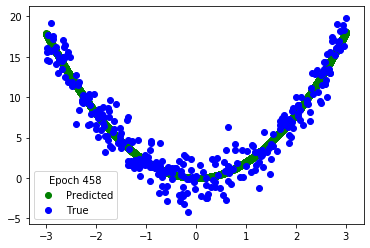

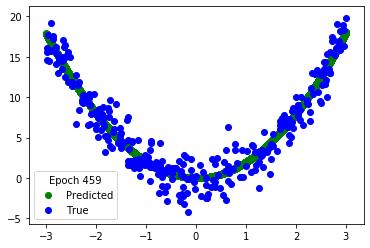

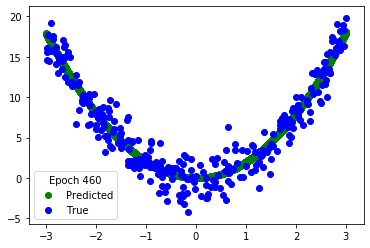

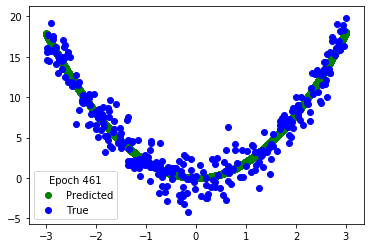

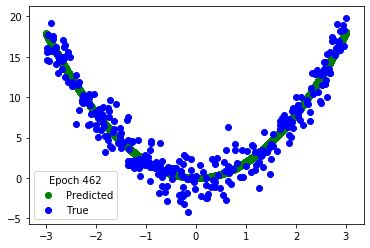

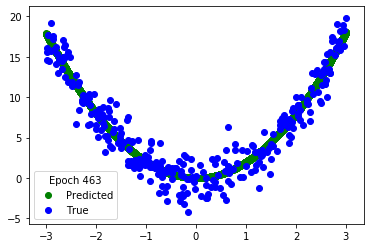

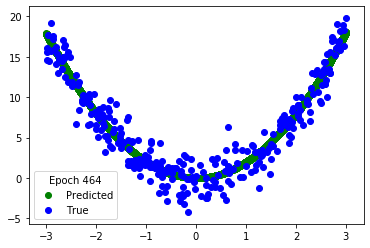

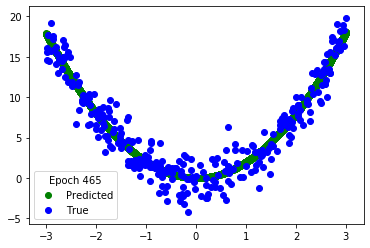

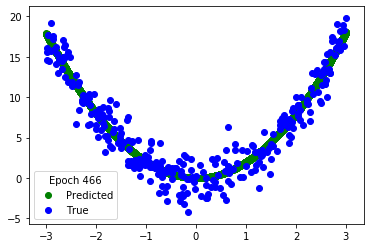

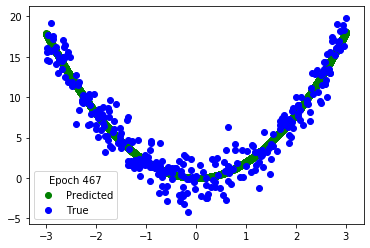

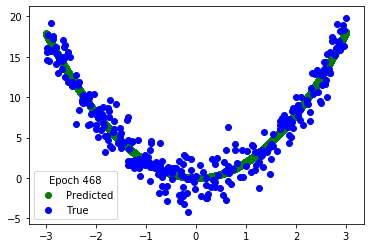

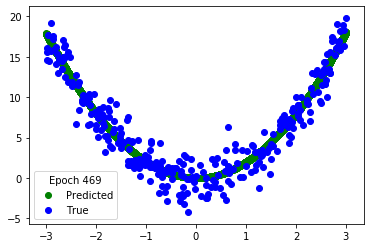

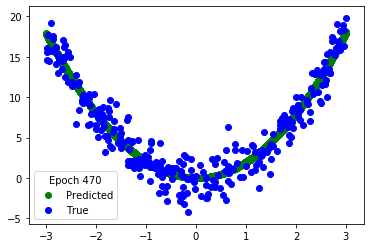

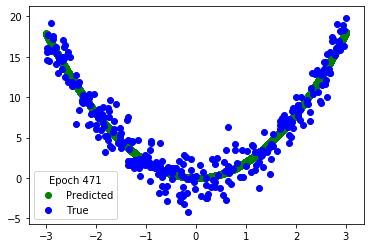

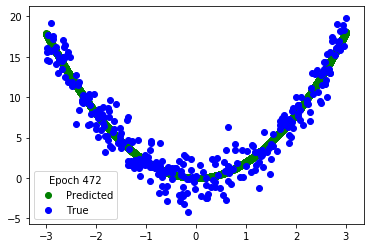

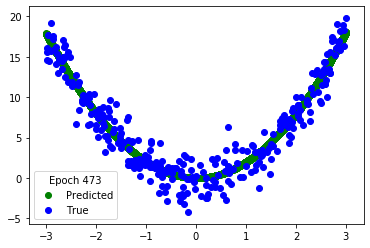

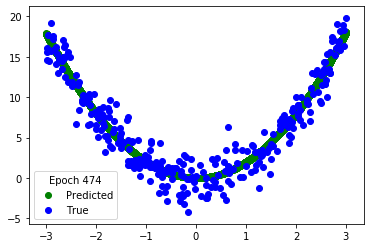

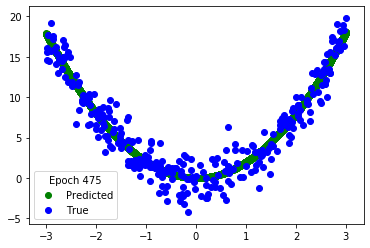

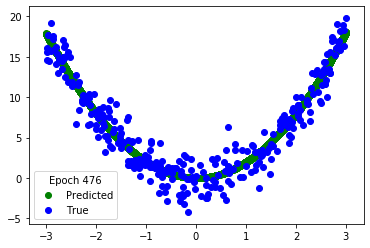

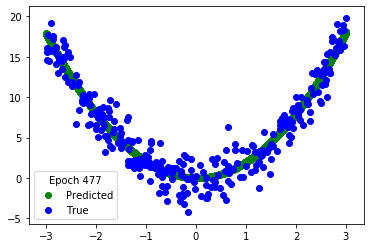

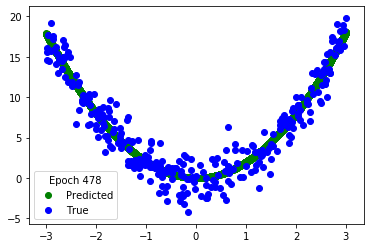

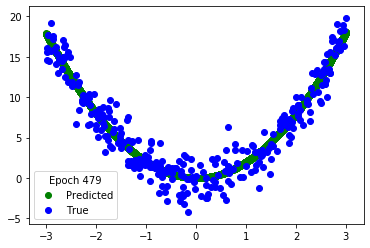

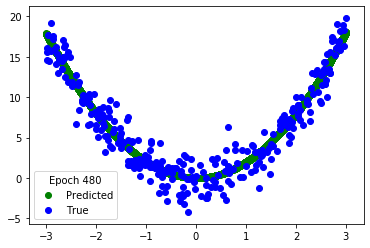

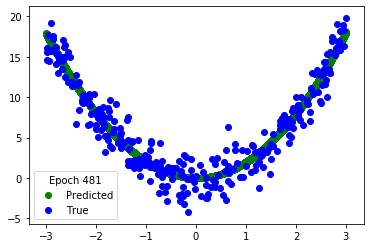

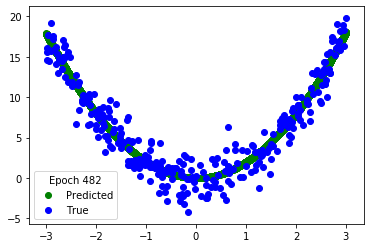

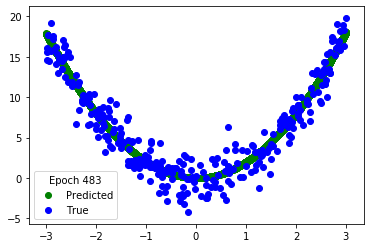

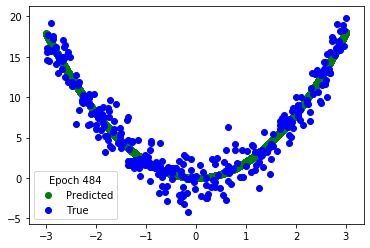

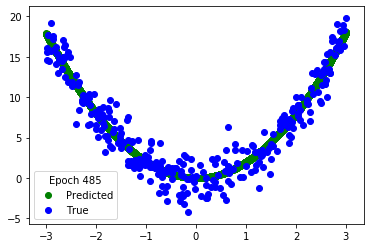

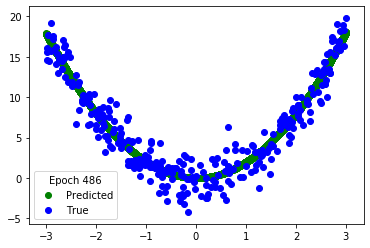

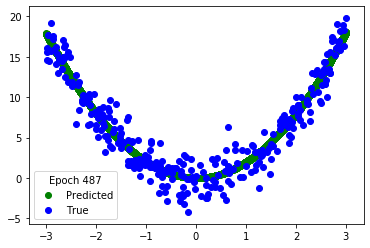

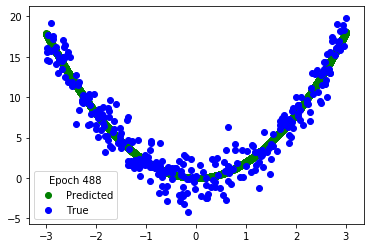

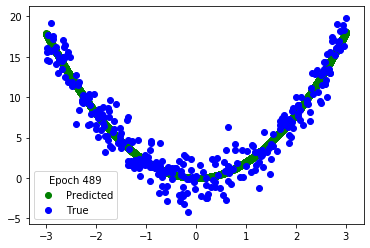

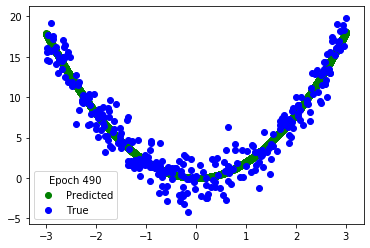

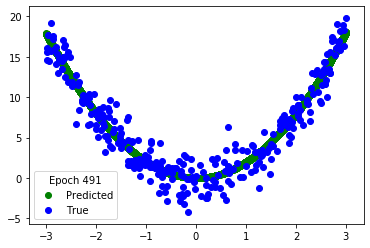

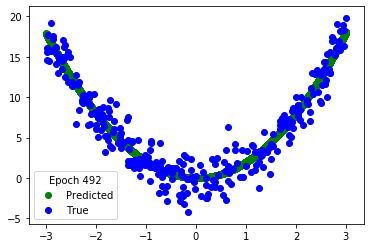

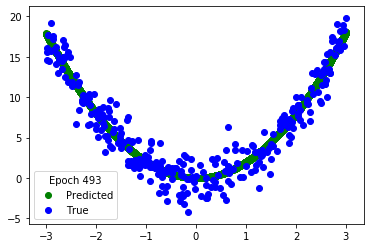

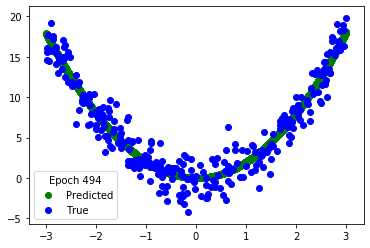

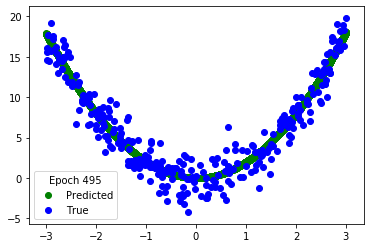

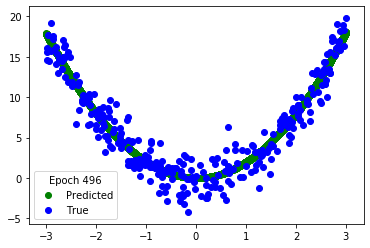

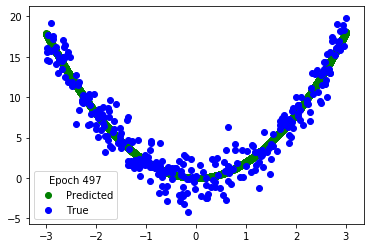

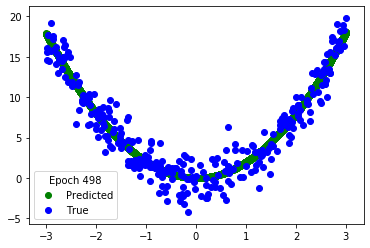

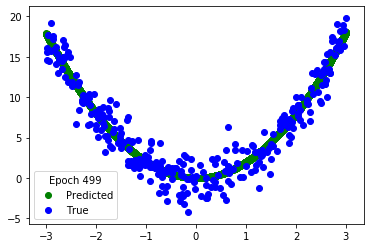

Converged...
	 loss: 2.019197
power: 0 coeff:<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.014532793>
power: 1 coeff:<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-0.03615825>
power: 2 coeff:<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.994678>
power: 3 coeff:<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.006182554>


In [7]:
batch_size=50
for epoch in range(500):
    start=0
    while start<len(tf_x):
        batch_x=tf_x[start:start+batch_size]
        batch_y=tf_y[start:start+batch_size]
        with tf.GradientTape() as tape:
            y_pred=polynomial(batch_x,variables)
            loss=tf.math.reduce_mean((y_pred-batch_y)**2)
            grad = tape.gradient(loss, variables)
        for key,val in variables.items():
            variables[key].assign(variables[key]-lr*grad[key])
        #print (variables)
        #break
        start += batch_size 
    #print ('Loss: ',
    y_pred=polynomial(tf_x,variables)
    plt.scatter(tf_x.numpy(),y_pred.numpy(),label='Predicted',c='g')
    plt.scatter(tf_x.numpy()[choice],tf_y.numpy()[choice],c='b',label='True')
    plt.legend(title=f"Epoch {epoch}")
    plt.show()
    #break
print ('Converged...\n\t loss:',loss.numpy())
for key,val in variables.items():
    print (f'power: {key} coeff:{val}')

### Gradient Descent
\begin{equation}
a^{t+1}_i=\omega^t_i-\gamma \frac{\partial L}{\partial \omega^t_i}
\end{equation} 
$\gamma$ is the learning rate.

In [ ]:
for i in range(100000):
    with tf.GradientTape() as tape:
        y_pred=polynomial(tf_x,variables)
        loss=tf.math.reduce_mean((y_pred-tf_y)**2)
        grad = tape.gradient(loss, variables)
    for key,val in variables.items():
        variables[key].assign(variables[key]-lr*grad[key])
    if loss<loss_threshold:
        break
    if (i)%verbose_freq==0:
        #print (y_pred)
        #print ('Loss: ',
        plt.scatter(tf_x.numpy()[choice],y_pred.numpy()[choice],c='g',label='Predicted',linewidth=1.5)
        plt.scatter(tf_x.numpy()[choice],tf_y.numpy()[choice],c='b',label='True')
        plt.legend(title=f"Epoch {i}")
        plt.show()
print ('Converged...\n\t loss:',loss.numpy())
for key,val in variables.items():
    print (f'power: {key} coeff:{val}')